In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.integrate import quad
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
import emcee
import corner

In [4]:
from time import time

In [3]:
path = "/home/bruno/Documents/COSMOamautas/Data/"

In [4]:
m = np.arange(7,12.4,0.2)

def SchreiberMS(m1,z): ## For plotting Schreiber+15 main sequence
    return m1-9 - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m1-9 - 0.36-2.5*np.log10(1+z),0.))**2

def SpeagleMS(m1,z): ## For plotting Speagle+14 main sequence:
    age = cosmo.age(z).value
    return (0.84-0.026*age)*m1-6.51+0.11*age

def CarnallQ(m1,z): ## For plotting Carnall+20 sSFR quiescent limit:
    age = cosmo.age(z).value
    return m1+np.log10(0.2/age)-9

In [14]:
results = pd.read_csv(path+"Bootes/Bootes_full_results_NDWFS.csv")
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),250_flux(mJy),250_std(mJy),350_flux(mJy),350_std(mJy),500_flux(mJy),500_std(mJy)
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,9.618697,1.345327e+00,4.702619,1.345327e+00,2.472898,1.345327e+00,-2.266401,1.345327e+00
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,12.729396,7.496409e+00,15.611442,7.496409e+00,17.773668,7.496409e+00,16.398212,7.496409e+00
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,30.195167,1.294989e+01,24.289074,1.294989e+01,14.517403,1.294989e+01,10.362504,1.294989e+01
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,2.269380,1.658360e+00,8.930486,1.658360e+00,8.763199,1.658360e+00,5.873197,1.658360e+00
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,6.580702,5.511290e+00,19.347064,5.511290e+00,11.847575,5.511290e+00,8.583230,5.511290e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,6.853042,2.340020e-01,10.503263,2.340020e-01,9.754903,2.340020e-01,5.490257,2.340020e-01
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,0.265135,8.673617e-16,13.082060,8.673617e-16,2.107945,8.673617e-16,-10.032671,8.673617e-16
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,26.525840,4.677406e+00,0.584115,4.677406e+00,0.961899,4.677406e+00,6.829856,4.677406e+00
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,5.821593,2.754533e+00,10.740943,2.754533e+00,10.741963,2.754533e+00,5.933872,2.754533e+00


In [5]:
results = pd.read_csv(path+"Bootes/Bootes_full_results_NDWFS_3.csv")
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),250_flux(mJy),250_std(mJy),350_flux(mJy),350_std(mJy),500_flux(mJy),500_std(mJy)
0,IRBQG,10.049999999999999 - 10.2,10.188737,0.5 - 1.0,0.73290,1,1.852234,3.827418e-16,-8.015293,0.000000e+00,26.635364,0.000000e+00,10.445602,0.000000e+00,13.149477,0.000000e+00,6.266338,0.000000e+00
1,IRBQG,10.2 - 10.35,10.283719,1.0 - 1.5,1.44240,3,0.021846,7.413352e-02,1.879532,1.264521e+01,24.322613,1.264521e+01,8.408497,1.264521e+01,11.596647,1.264521e+01,12.171324,1.264521e+01
2,IRBQG,10.35 - 10.5,10.434191,0.5 - 1.0,0.70760,1,0.702044,1.913709e-16,-4.270449,8.673617e-16,-8.021799,8.673617e-16,-0.493414,8.673617e-16,-6.957074,8.673617e-16,-10.630174,8.673617e-16
3,IRBQG,10.35 - 10.5,10.384141,1.0 - 1.5,1.41880,2,0.106723,1.621911e-02,8.031770,4.247767e+00,3.192497,4.247767e+00,29.781119,4.247767e+00,28.241519,4.247767e+00,24.183328,4.247767e+00
4,IRBQG,10.5 - 10.65,10.551246,0.5 - 1.0,0.83860,2,0.042799,5.671700e-02,12.075329,6.781859e+00,25.515403,6.781859e+00,6.674760,6.781859e+00,4.503207,6.781859e+00,2.352707,6.781859e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,SFG,11.7 - 11.85,11.735640,0.5 - 1.0,0.67935,2,-0.003740,3.857477e-02,8.323897,5.013423e+00,38.989747,5.013423e+00,-3.387627,5.013423e+00,-4.413124,5.013423e+00,2.222912,5.013423e+00
133,SFG,11.85 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,1.196068e-17,-3.662153,2.168404e-15,0.265135,2.168404e-15,13.082060,2.168404e-15,2.107945,2.168404e-15,-10.032671,2.168404e-15
134,SFG,11.85 - 12.0,11.976331,1.0 - 1.5,1.34960,1,-0.160029,4.784272e-17,11.325651,1.734723e-15,-33.259291,1.734723e-15,0.688749,1.734723e-15,1.711294,1.734723e-15,-0.433279,1.734723e-15
135,SFG,12.15 - 12.3,12.235741,1.0 - 1.5,1.42760,2,-0.050693,2.022645e-02,-8.212630,6.407462e+00,-31.260071,6.407462e+00,-6.942097,6.407462e+00,-3.609250,6.407462e+00,-10.433315,6.407462e+00


In [89]:
results_1 = pd.read_csv(path+"Bootes/Bootes_full_results_NDWFS.csv")
results_1 = results_1.loc[results_1['Median_mass']>=9]
results_1

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),250_flux(mJy),250_std(mJy),350_flux(mJy),350_std(mJy),500_flux(mJy),500_std(mJy)
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,9.618697,1.345327e+00,4.702619,1.345327e+00,2.472898,1.345327e+00,-2.266401,1.345327e+00
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,12.729396,7.496409e+00,15.611442,7.496409e+00,17.773668,7.496409e+00,16.398212,7.496409e+00
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,30.195167,1.294989e+01,24.289074,1.294989e+01,14.517403,1.294989e+01,10.362504,1.294989e+01
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,2.269380,1.658360e+00,8.930486,1.658360e+00,8.763199,1.658360e+00,5.873197,1.658360e+00
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,6.580702,5.511290e+00,19.347064,5.511290e+00,11.847575,5.511290e+00,8.583230,5.511290e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,6.853042,2.340020e-01,10.503263,2.340020e-01,9.754903,2.340020e-01,5.490257,2.340020e-01
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,0.265135,8.673617e-16,13.082060,8.673617e-16,2.107945,8.673617e-16,-10.032671,8.673617e-16
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,26.525840,4.677406e+00,0.584115,4.677406e+00,0.961899,4.677406e+00,6.829856,4.677406e+00
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,5.821593,2.754533e+00,10.740943,2.754533e+00,10.741963,2.754533e+00,5.933872,2.754533e+00


In [6]:
### ONLY IF THE SFR RESULTS HAVE ALREADY BEEN COMPUTED
results = pd.read_csv(path+"Bootes/Bootes_stack_full_results_NDWFS_3.csv")
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,SFR8_median,SFR40_median,SFR8_upper,SFR40_upper,SFR8_ratio,SFR8_ratio_unc,SFR40_ratio,SFR40_ratio_unc,IR_detected,Radio_detected
0,IRBQG,10.049999999999999 - 10.2,10.188737,0.5 - 1.0,0.73290,1,1.852234,3.827418e-16,-8.015293,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,IRBQG,10.2 - 10.35,10.283719,1.0 - 1.5,1.44240,3,0.021846,7.413352e-02,1.879532,1.264521e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,IRBQG,10.35 - 10.5,10.434191,0.5 - 1.0,0.70760,1,0.702044,1.913709e-16,-4.270449,8.673617e-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,IRBQG,10.35 - 10.5,10.384141,1.0 - 1.5,1.41880,2,0.106723,1.621911e-02,8.031770,4.247767e+00,...,363.836746,307.430938,3.784112e+01,3.016779e+01,0.172175,0.031041,0.203765,0.036058,2,0
4,IRBQG,10.5 - 10.65,10.551246,0.5 - 1.0,0.83860,2,0.042799,5.671700e-02,12.075329,6.781859e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,SFG,11.7 - 11.85,11.735640,0.5 - 1.0,0.67935,2,-0.003740,3.857477e-02,8.323897,5.013423e+00,...,72.175142,47.634752,2.246339e+01,1.090609e+01,NaN,NaN,NaN,NaN,0,0
133,SFG,11.85 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,1.196068e-17,-3.662153,2.168404e-15,...,2.059226,1.773886,1.374971e-08,1.173871e-08,1.312307,0.024424,1.523400,0.028353,0,0
134,SFG,11.85 - 12.0,11.976331,1.0 - 1.5,1.34960,1,-0.160029,4.784272e-17,11.325651,1.734723e-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
135,SFG,12.15 - 12.3,12.235741,1.0 - 1.5,1.42760,2,-0.050693,2.022645e-02,-8.212630,6.407462e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [8]:
detected = pd.read_csv(path+"Bootes/Bootes_full_detected_count.csv")
detected

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,IR_detected,Radio_detected
0,IRBQG,10.049999999999999 - 10.2,10.188737,0.5 - 1.0,0.73290,1,1,1
1,IRBQG,10.2 - 10.35,10.283719,1.0 - 1.5,1.44240,3,3,0
2,IRBQG,10.35 - 10.5,10.434191,0.5 - 1.0,0.70760,1,1,0
3,IRBQG,10.35 - 10.5,10.384141,1.0 - 1.5,1.41880,2,2,0
4,IRBQG,10.5 - 10.65,10.551246,0.5 - 1.0,0.83860,2,2,0
...,...,...,...,...,...,...,...,...
132,SFG,11.7 - 11.85,11.735640,0.5 - 1.0,0.67935,2,0,0
133,SFG,11.85 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0,0
134,SFG,11.85 - 12.0,11.976331,1.0 - 1.5,1.34960,1,0,0
135,SFG,12.15 - 12.3,12.235741,1.0 - 1.5,1.42760,2,0,0


In [14]:
results.loc[:,'IR_detected']=detected.loc[:,'IR_detected']

In [16]:
results.loc[:,'Radio_detected']=detected.loc[:,'Radio_detected']

In [17]:
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,SFR8_median,SFR40_median,SFR8_upper,SFR40_upper,SFR8_ratio,SFR8_ratio_unc,SFR40_ratio,SFR40_ratio_unc,IR_detected,Radio_detected
0,IRBQG,10.049999999999999 - 10.2,10.188737,0.5 - 1.0,0.73290,1,1.852234,3.827418e-16,-8.015293,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,IRBQG,10.2 - 10.35,10.283719,1.0 - 1.5,1.44240,3,0.021846,7.413352e-02,1.879532,1.264521e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,IRBQG,10.35 - 10.5,10.434191,0.5 - 1.0,0.70760,1,0.702044,1.913709e-16,-4.270449,8.673617e-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,IRBQG,10.35 - 10.5,10.384141,1.0 - 1.5,1.41880,2,0.106723,1.621911e-02,8.031770,4.247767e+00,...,363.836746,307.430938,3.784112e+01,3.016779e+01,0.172175,0.031041,0.203765,0.036058,2,0
4,IRBQG,10.5 - 10.65,10.551246,0.5 - 1.0,0.83860,2,0.042799,5.671700e-02,12.075329,6.781859e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,SFG,11.7 - 11.85,11.735640,0.5 - 1.0,0.67935,2,-0.003740,3.857477e-02,8.323897,5.013423e+00,...,72.175142,47.634752,2.246339e+01,1.090609e+01,NaN,NaN,NaN,NaN,0,0
133,SFG,11.85 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,1.196068e-17,-3.662153,2.168404e-15,...,2.059226,1.773886,1.374971e-08,1.173871e-08,1.312307,0.024424,1.523400,0.028353,0,0
134,SFG,11.85 - 12.0,11.976331,1.0 - 1.5,1.34960,1,-0.160029,4.784272e-17,11.325651,1.734723e-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
135,SFG,12.15 - 12.3,12.235741,1.0 - 1.5,1.42760,2,-0.050693,2.022645e-02,-8.212630,6.407462e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


## Calculating SFR from LOFAR stacked fluxes

In [8]:
def SFR_lofar(flux,flux_unc,z):
    ''' Get 150 MHz luminosity and the SFR, according to the
        mass-independant L150-SFR relationship by Smith et al. 2020
        log10(L150[W Hz^-1]) = 1.058*log10(SFR[Msun/year]) + 22.221
        Also get the total uncertainty in the SFR
        https://arxiv.org/pdf/2011.08196v1.pdf
    '''
    beta=1.058
    beta_unc=0.007
    logL1=22.221
    logL1_unc=0.008    
    # Luminosity in W/Hz
    L150 = (10**-29)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    L150_unc = (10**-29)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    #log10(L150) = 1.058*log10(SFR) + 22.221
    log10SFR = (np.log10(L150) - logL1)/beta
    SFR = 10**log10SFR
    SFR_unc2 = ( (L150_unc/L150)**2 + (np.log(SFR)*beta_unc)**2 + (np.log(10)*logL1_unc)**2 )*((SFR/beta)**2)
    SFR_unc = (L150_unc/L150)*(SFR/beta)
    
    return L150, SFR, np.sqrt(SFR_unc2), SFR_unc

SFR_lofar_v = np.vectorize(SFR_lofar)

In [9]:
# Mass-independant SFR
results['L150MHZ'], results['SFR_lofar'], results['SFR_lofar_unc'], results['SFR_lofar_error'] = SFR_lofar_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


In [91]:
# Mass-independant SFR
results_1['L150MHZ'], results_1['SFR_lofar'], results_1['SFR_lofar_unc'], results_1['SFR_lofar_error'] = SFR_lofar_v(results_1['LOFAR_flux(mJy)'],results_1['LOFAR_std(mJy)'],results_1['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
def SFR_lofar_M(flux,flux_unc,mass,z):
    ''' Get 150 MHz luminosity and the SFR, according to the
        mass-dependant L150-SFR relationship by Smith et al. 2020
        log10(L150[W Hz^-1]) = 0.9*log10(SFR[Msun/year]) + 0.33*log10(M[10^10Msun]) + 22.22
        Also get the total uncertainty in the SFR
        https://arxiv.org/pdf/2011.08196v1.pdf
    '''
    beta=0.903
    beta_unc=0.012
    logLc=22.218
    logLc_unc=0.016
    gamma=0.332
    gamma_unc=0.037
    # Luminosity in W/Hz
    L150 = (10**-29)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    L150_unc = (10**-29)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    #log10(L150) = 0.9*log10(SFR) + 0.33*(M-10) + 22.22
    log10SFR = (np.log10(L150) - gamma*(mass-10) - logLc)/beta
    SFR = 10**log10SFR
    
    SFR_unc2 = ( (L150_unc/L150)**2 + (np.log(SFR)*beta_unc)**2 + (np.log(10)*logLc_unc)**2 + (np.log(10)*(10-mass)*gamma_unc)**2 )*((SFR/beta)**2)
    
    return L150, SFR, np.sqrt(SFR_unc2)

SFR_lofar_M_v = np.vectorize(SFR_lofar_M)

In [11]:
# Mass-dependant SFR
results['L150MHZ'], results['SFR_lofar_M'], results['SFR_lofar_M_unc'] = SFR_lofar_M_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_mass'],results['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


In [92]:
# Mass-dependant SFR
results_1['L150MHZ'], results_1['SFR_lofar_M'], results_1['SFR_lofar_M_unc'] = SFR_lofar_M_v(results_1['LOFAR_flux(mJy)'],results_1['LOFAR_std(mJy)'],results_1['Median_mass'],results_1['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
results = results[results['Median_mass']>=9]

In [10]:
def SFR_CR(flux,flux_unc,z):
    ''' Get the SFR from 150 MHz luminosity, according to the
        L150-SFR relationship by Calistro-Rivera et al. 2017
        SFR150MHz [Msun/year] = 1.455*10^-31*10^q150(z)* L150 [erg/s],
        with q150(z) = 1.72*(1+z)**-0.22
        https://arxiv.org/pdf/1704.06268.pdf
    '''
    # Luminosity in erg s^-1 Hz^-1
    Lerg = (10**-22)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    Lerg_unc = (10**-22)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    q = 1.544
    q_unc = 0.019
    a = 1.72
    b = 0.22
    qz = a*(1+z)**-b
    a_unc = 0.04
    b_unc = 0.05
    qz_unc2 = (qz*a_unc/a)**2 + (qz*np.log(1+z)*b_unc)**2
    
    SFR = Lerg*1.455*(10**-31)*(10**q)
    SFRz = Lerg*1.455*(10**-31)*(10**qz)
    
    SFR_unc = np.sqrt( ((Lerg_unc/Lerg)**2 + (np.log(10)*q_unc)**2)*((SFR)**2) )
    SFRz_unc = np.sqrt( ((Lerg_unc/Lerg)**2 + (qz_unc2*np.log(10)**2))*((SFRz)**2) )
    
    return SFR, SFR_unc, SFRz, SFRz_unc

SFR_CR_v = np.vectorize(SFR_CR)

In [13]:
# SFR from Calistro-Rivera et al. 2017
results['SFR_CR'], results['SFR_CR_unc'], results['SFR_CRz'], results['SFR_CRz_unc'] = SFR_CR_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_redshift'])

In [93]:
# SFR from Calistro-Rivera et al. 2017
results_1['SFR_CR'], results_1['SFR_CR_unc'], results_1['SFR_CRz'], results_1['SFR_CRz_unc'] = SFR_CR_v(results_1['LOFAR_flux(mJy)'],results_1['LOFAR_std(mJy)'],results_1['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
results.loc[results['Type']=='QG',['Count','Radio_detected']].sum()

Count             83628
Radio_detected     1066
dtype: int64

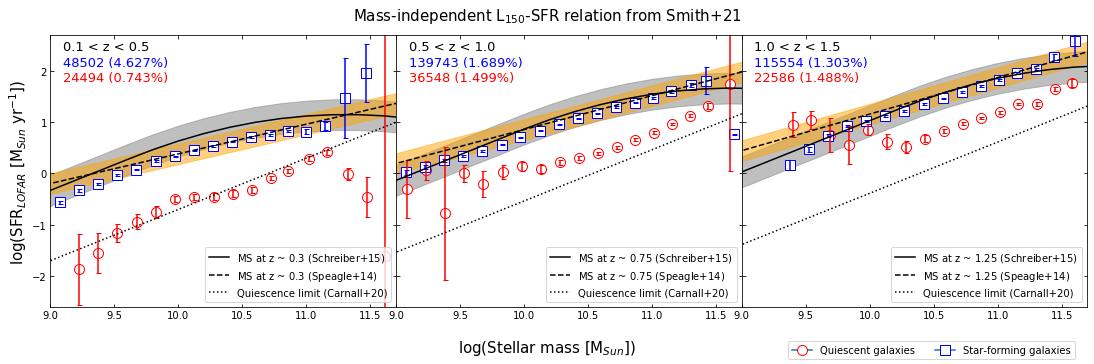

In [11]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
#    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
#                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
#                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
#                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    SFG, SFGdetec = data.loc[data['Type']=='SFG',['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[data['Type']=='QG', ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
#    for t,mass,n in zip(data.loc[:,'Type'],data.loc[:,'Median_mass'],data.loc[:,'Count']):
#        if t == 'QG':
#            axs[i].text(np.floor(mass/0.15)*0.15,-1.7,f'{n}',c='r',size=10, rotation='vertical')
#        elif t == 'SFG':
#            axs[i].text(np.floor(mass/0.15)*0.15,-1.5,f'{n}',c='b',size=10, rotation='vertical')
#        else:
#            axs[i].text(np.floor(mass/0.15)*0.15,-1.3,f'{n}',c='purple',size=10, rotation='vertical')
#        axs[i].axvline(np.floor(mass/0.15)*0.15,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+21',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

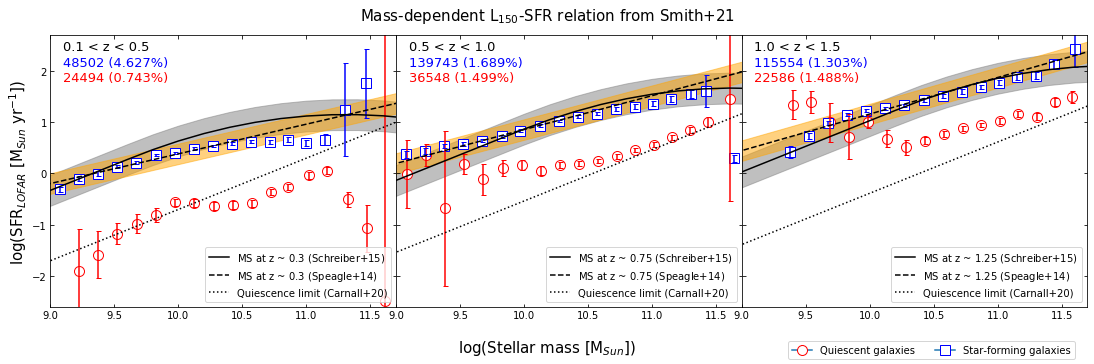

In [99]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
#    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
#                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
#                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
#                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    SFG, SFGdetec = data.loc[data['Type']=='SFG',['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[data['Type']=='QG', ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation from Smith+21',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


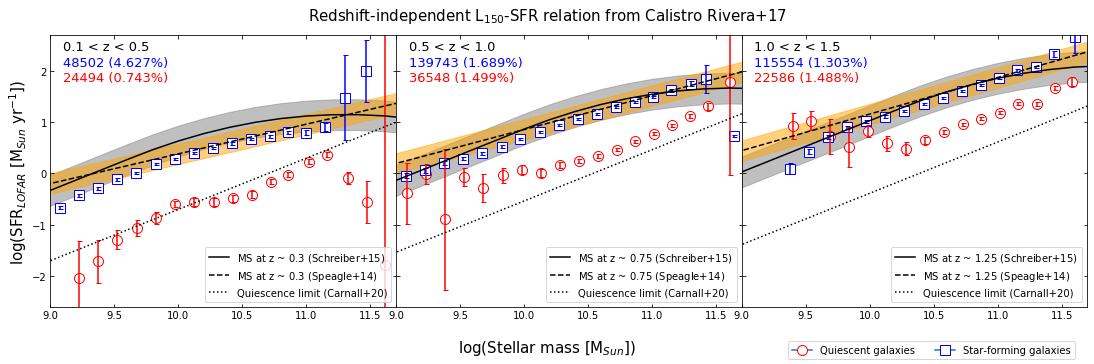

In [50]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CR_unc']/(data.loc[(data['Type']=='QG'),'SFR_CR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CR_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
#    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
#                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_CR']),
#                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_CR_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_CR']*np.log(10)),
#                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    SFG, SFGdetec = data.loc[data['Type']=='SFG',['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[data['Type']=='QG', ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-independent L$_{150}$-SFR relation from Calistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


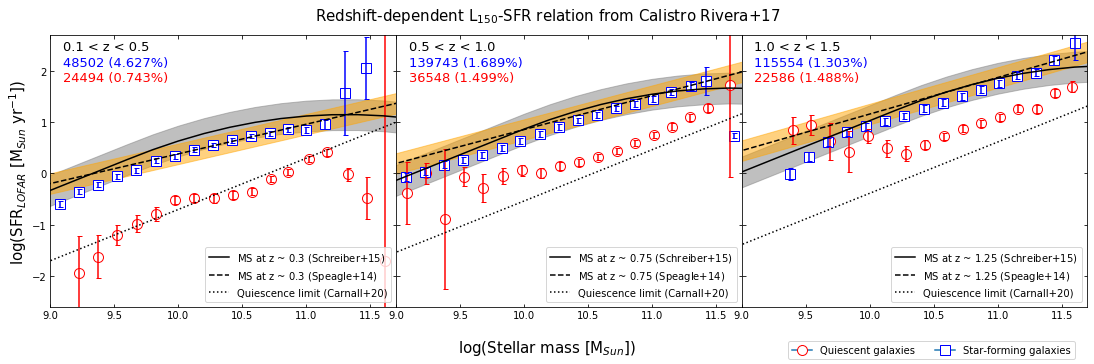

In [51]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    marker1=axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    marker2=axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
#    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
#                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_CRz']),
#                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_CRz']*np.log(10)),
#                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    SFG, SFGdetec = data.loc[data['Type']=='SFG',['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[data['Type']=='QG', ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-dependent L$_{150}$-SFR relation from Calistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


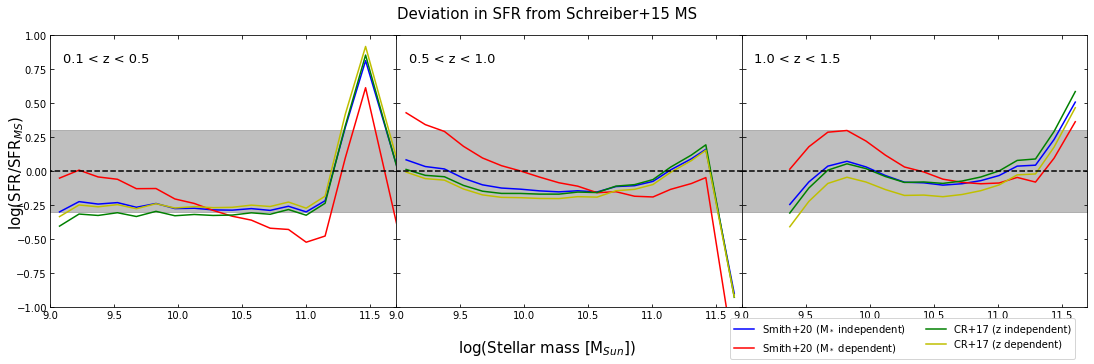

In [57]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Smith+20 (M$_*$ independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Smith+20 (M$_*$ dependent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='g', label=f'CR+17 (z independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='y', label=f'CR+17 (z dependent)')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.3,-0.3],[0.3,0.3],alpha=0.5,color='grey')
    axs[i].text(9.1,0.8,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Schreiber+15 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Smith+20 (M$_*$ independent)')
marker2=plt.errorbar([],[],c='r', label=f'Smith+20 (M$_*$ dependent)')
marker3=plt.errorbar([],[],c='g', label=f'CR+17 (z independent)')
marker4=plt.errorbar([],[],c='y', label=f'CR+17 (z dependent)')
fig.legend(handles=[marker1,marker2,marker3,marker4],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


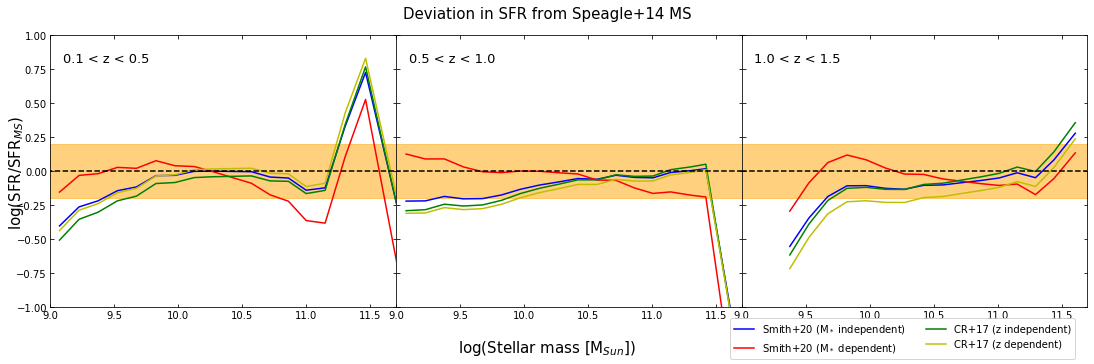

In [61]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Smith+20 (M$_*$ independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Smith+20 (M$_*$ dependent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='g', label=f'CR+17 (z independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='y', label=f'CR+17 (z dependent)')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.2,-0.2],[0.2,0.2],alpha=0.5,color='orange')
    axs[i].text(9.1,0.8,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Speagle+14 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Smith+20 (M$_*$ independent)')
marker2=plt.errorbar([],[],c='r', label=f'Smith+20 (M$_*$ dependent)')
marker3=plt.errorbar([],[],c='g', label=f'CR+17 (z independent)')
marker4=plt.errorbar([],[],c='y', label=f'CR+17 (z dependent)')
fig.legend(handles=[marker1,marker2,marker3,marker4],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

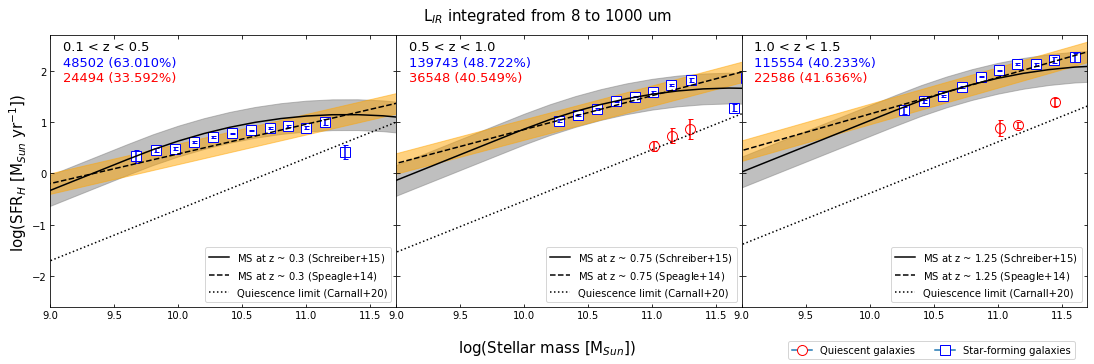

In [102]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    marker1=axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    marker2=axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
#    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
#                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR8_median']),
#                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR8_upper']/(data.loc[(data['Type']=='IRBQG'),'SFR8_median']*np.log(10)),
#                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    SFG, SFGdetec = data.loc[data['Type']=='SFG',['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[data['Type']=='QG', ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

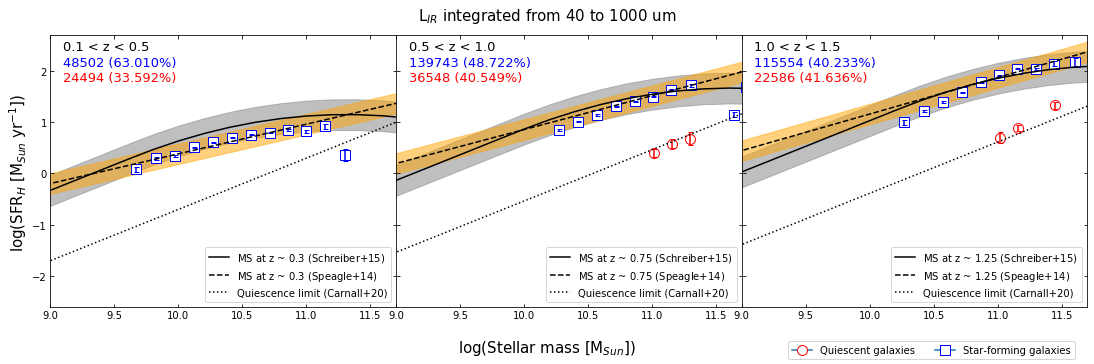

In [94]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    marker1=axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR40_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR40_upper']/(data.loc[(data['Type']=='QG'),'SFR40_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    marker2=axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR40_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR40_upper']/(data.loc[(data['Type']=='SFG'),'SFR40_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
#    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
#                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR40_median']),
#                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR40_upper']/(data.loc[(data['Type']=='IRBQG'),'SFR40_median']*np.log(10)),
#                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    SFG, SFGdetec = data.loc[data['Type']=='SFG',['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[data['Type']=='QG', ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

In [95]:
results['SFR8_ratio']=results['SFR_lofar']/results['SFR8_median']
results['SFR8_ratio_unc']=np.sqrt( (results['SFR8_ratio']**2)*((results['SFR_lofar_unc']/results['SFR_lofar'])**2 + (results['SFR8_upper']/results['SFR8_median'])**2) )
results['SFR40_ratio']=results['SFR_lofar']/results['SFR40_median']
results['SFR40_ratio_unc']=np.sqrt( (results['SFR40_ratio']**2)*((results['SFR_lofar_unc']/results['SFR_lofar'])**2 + (results['SFR40_upper']/results['SFR40_median'])**2) )

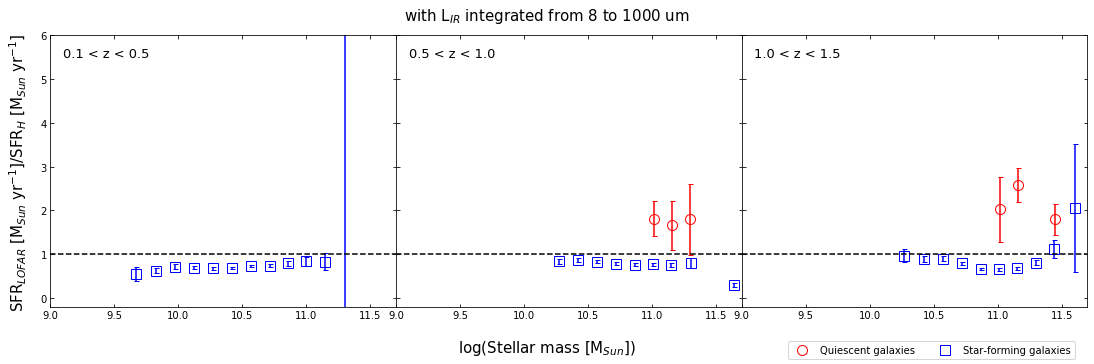

In [96]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR8_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR8_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 8 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$]/SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

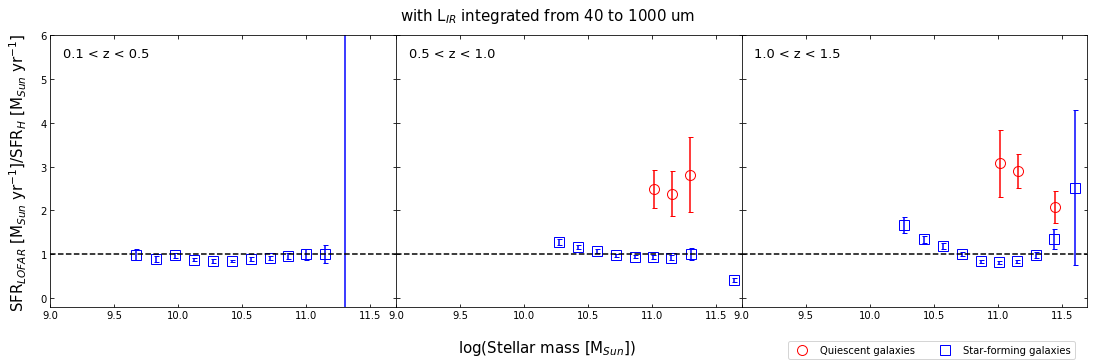

In [97]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR40_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR40_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$]/SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

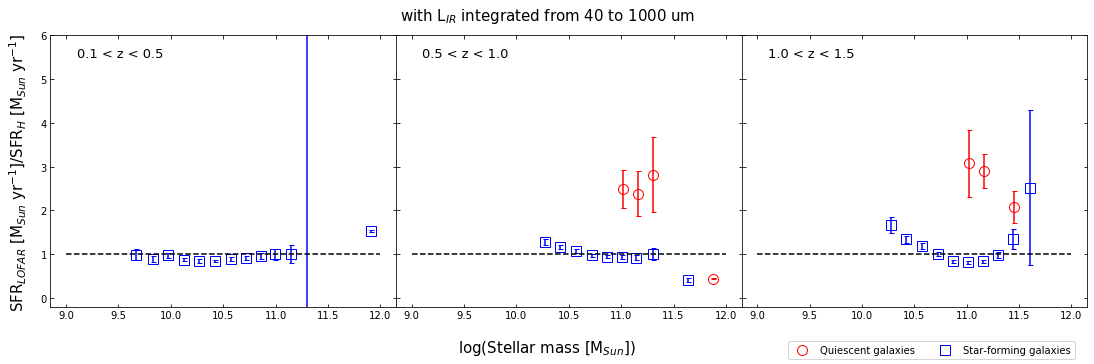

In [23]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR40_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR40_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$]/SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

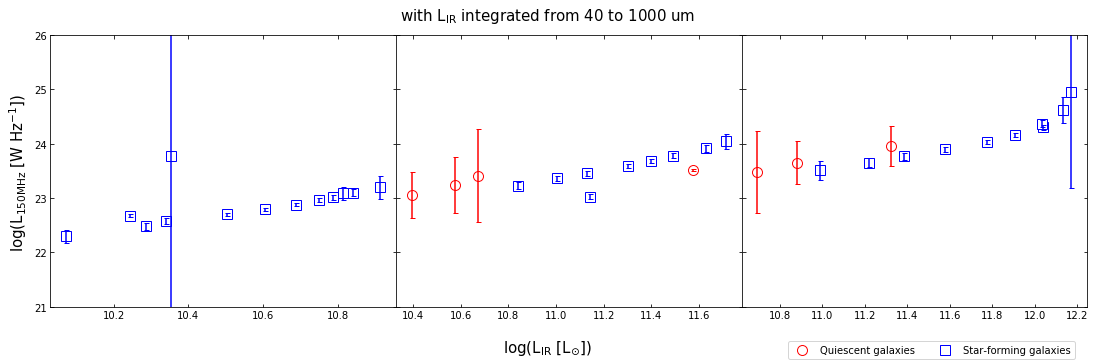

In [34]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'LIR40_median'],
                    np.log10(data.loc[(data['Type']=='QG'),'L150MHZ']),
                    yerr=data.loc[(data['Type']=='QG'),'SFR40_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'LIR40_median'],
                    np.log10(data.loc[(data['Type']=='SFG'),'L150MHZ']),
                    yerr=data.loc[(data['Type']=='SFG'),'SFR40_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    #axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    #axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=21,ymax=26)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{\mathrm{IR}}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(L$_{\mathrm{IR}}$ [L$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(L$_{150 \mathrm{ MHz}}$ [W Hz$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

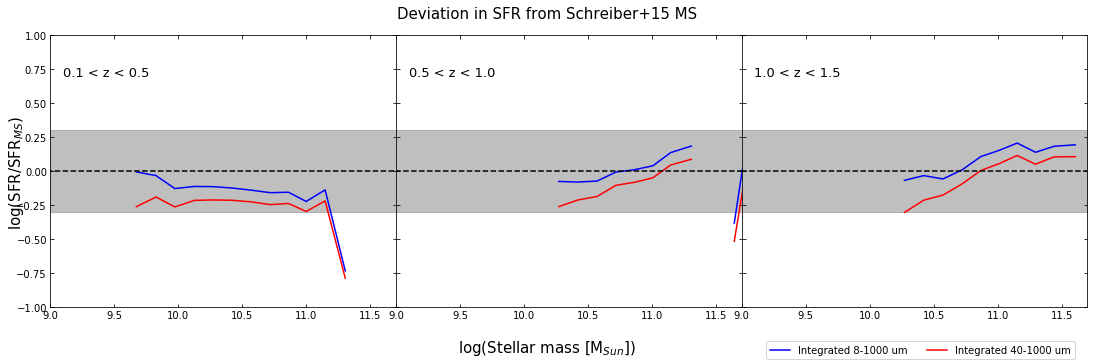

In [98]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Integrated 8-1000 um')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR40_median'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Integrated 40-1000 um')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.3,-0.3],[0.3,0.3],alpha=0.5,color='grey')
    axs[i].text(9.1,0.7,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Schreiber+15 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Integrated 8-1000 um')
marker2=plt.errorbar([],[],c='r', label=f'Integrated 40-1000 um')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

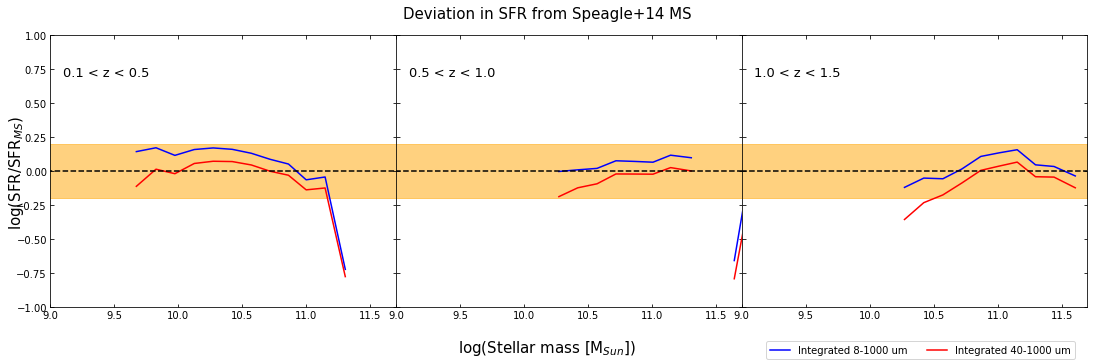

In [63]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Integrated 8-1000 um')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR40_median'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Integrated 40-1000 um')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.2,-0.2],[0.2,0.2],alpha=0.5,color='orange')
    axs[i].text(9.1,0.7,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Speagle+14 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Integrated 8-1000 um')
marker2=plt.errorbar([],[],c='r', label=f'Integrated 40-1000 um')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Fitting grey body model to Herschel stacked fluxes to calculate SFR

In [12]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [13]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        print(z_obj)
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [24]:
results['Tdust'], results['Norm'], results['LIR_H'] = V_Herschel(results['Median_redshift'],results['100_flux(mJy)'],results['160_flux(mJy)'],results['250_flux(mJy)'],results['350_flux(mJy)'],results['500_flux(mJy)'])

results['SFR_H'] = np.power(10,results['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

0.7329
0.7329
1.4424
0.7076
1.4188
0.8386
1.38975
1.4466
0.9156
1.426
0.952
1.41715
0.909
1.4112
0.9463
1.37925
0.8623
1.422
1.102


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


0.2323
0.59615
1.1943
0.2361
0.6016
1.1298
0.2379
0.6147
1.1524
0.2554
0.6253


/home/bruno/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.1627
Failed fit
0.2797
0.64405
1.1911999999999998
0.3068
0.6779999999999999
1.1837
0.319
0.68285
1.1929
0.33535000000000004
0.6979
1.1765
0.3564
0.7138
1.14115
0.3659
0.7328
1.1311
0.3744
0.7576
1.14015
0.384
0.7656499999999999
1.1429
0.38905
0.7747
1.1561
0.40565
0.7763
1.1729
0.40435
0.77185
1.19475
0.3362
0.7802
1.2044
0.3289
0.8087
1.2363
0.32685
0.90455
1.2362
0.3301
0.5794
1.38245
0.26955
0.5522
0.3786
0.6287
0.3354
0.7297
1.25005
0.3474
0.75465
1.2413500000000002
0.3605
0.75975
1.2197
0.3753
0.7663
1.2038
0.3841
0.7706500000000001
1.1995
0.3898
0.7805
1.2059


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


0.3848
0.7917
1.2062
0.38195
0.7958
1.18735
0.3842
0.80075
1.1848
0.3851
0.8062
1.19055
0.3869
0.8059
1.19975
0.3852
0.80755
1.2082
0.3929
0.81145
1.2193
0.4051
0.8201
1.23765
0.4047
0.8326
1.2598
0.2808
0.8452500000000001
1.2866
0.3605
0.8387
1.32425
0.6209
1.3517
0.67935
0.4055
1.3496
1.4276
1.4655


/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


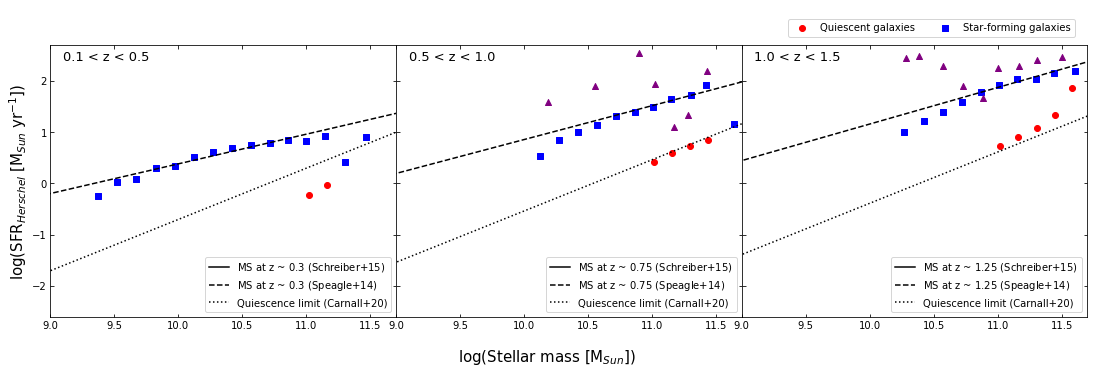

In [25]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].scatter(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   marker='o',color='r',label='_Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   marker='s',color='b',label='_Star-forming galaxies')
    axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_H']),
                   marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
#fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+20',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{Herschel}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=plt.scatter([],[],marker='o',color='r',label='Quiescent galaxies')
marker2=plt.scatter([],[],marker='s',color='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

In [69]:
results.loc[(results['Type']=='QG')&(results['Median_mass']>11),['Type','Median_mass','Median_redshift','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H','SFR8_median']]

,Type,Median_mass,Median_redshift,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H,SFR8_median
57,QG,11.017330,0.40565,620,0.423398,1.384692,-0.854758,-1.533174,-1.052853,161.577553,5.714438e+02,9.773397,0.601894,NaN
58,QG,11.016455,0.77630,3393,-0.050860,1.809938,0.083685,-0.074242,-0.322518,52.299401,1.149238e+04,10.409613,2.604570,3.454631
59,QG,11.019373,1.17290,3721,0.155751,1.004537,-0.012454,0.315543,0.104220,64.797641,4.102281e+03,10.725787,5.393984,7.641644
60,QG,11.162854,0.40435,298,0.747394,1.325265,-0.563937,-1.320166,-1.746246,205.282586,5.604919e+02,9.956802,0.918175,NaN
61,QG,11.158484,0.77185,1850,0.846501,1.324670,0.644703,0.225867,0.158927,58.924311,1.172492e+04,10.594759,3.989170,5.493735
62,QG,11.162594,1.19475,2242,0.144282,0.913897,0.801821,1.294256,1.553499,19.458915,7.306496e+05,10.895673,7.976209,NaN
63,QG,11.323148,0.33620,128,-0.613375,-4.216993,-3.574557,-3.425942,-3.260029,21.045306,-1.627315e+06,NaN,NaN,NaN
64,QG,11.300543,0.78020,663,1.143631,1.822551,0.576440,-0.148269,-0.515899,74.736180,7.094695e+03,10.722320,5.351101,7.482241
65,QG,11.304626,1.20440,913,0.380790,1.457986,0.595973,1.381347,0.951181,41.907686,4.164839e+04,11.077410,12.120842,NaN
66,QG,11.473045,0.32890,49,0.840500,-1.101939,-1.295246,-0.541192,0.660265,23.027960,-2.260385e+05,NaN,NaN,NaN


In [75]:
results.loc[results['Type']=='SFG',['Type','Median_mass','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
46,SFG,9.216966,22791,0.372953,1.266977,-1.603335,-2.260958,-1.734612,11.107438,-9.366262e+06,NaN,NaN
47,SFG,9.283014,38361,-0.025578,0.103194,-2.233316,-2.426758,-1.838325,17.576201,-1.699210e+06,NaN,NaN
48,SFG,9.291921,30145,-0.352813,-0.470742,-3.302285,-3.422198,-2.517921,25.339004,-6.120513e+05,NaN,NaN
49,SFG,9.721506,13938,1.696732,3.090944,0.318797,-1.401116,-1.513301,64.839972,1.685560e+04,10.359862,2.322660
50,SFG,9.746766,49993,0.221658,0.653499,-1.461418,-1.949673,-1.698616,15.326601,-2.338239e+06,NaN,NaN
51,SFG,9.742299,37463,-0.141427,0.034233,-1.948900,-2.040053,-1.482636,23.826012,-4.484432e+05,NaN,NaN
52,SFG,10.211585,8615,4.282728,8.405123,5.139538,1.330739,-0.482059,38.618891,2.894364e+05,10.667703,4.718740
53,SFG,10.211694,34930,0.970682,2.159370,0.853935,-0.292073,-0.898986,67.314698,1.014986e+04,10.973451,9.540565
54,SFG,10.230150,28219,0.480205,1.571669,0.132587,-0.001898,-0.152188,83.022712,3.175211e+03,11.257574,18.352565
55,SFG,10.649314,3044,6.461922,12.876568,10.914683,4.757299,0.912142,33.241803,8.431636e+05,10.865371,7.438656


In [37]:
### FOR TRIAL USE

def HerschelLIR(z_obj,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5])
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        y_err = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3
        print(z_obj)
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,sigma=y_err,absolute_sigma=True,p0=[30,10**4])#,bounds=([10,100],[100,np.inf]))
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [38]:
for i in range(len(results)):
    results.loc[i,'Tdust'], results.loc[i,'Norm'], results.loc[i,'LIR_H'] = HerschelLIR(results.loc[i,'Median_redshift'],results.loc[i,'100_flux(mJy)'],results.loc[i,'160_flux(mJy)'],results.loc[i,'250_flux(mJy)'],results.loc[i,'350_flux(mJy)'],results.loc[i,'500_flux(mJy)'],results.loc[i,'100_std(mJy)'],results.loc[i,'160_std(mJy)'],results.loc[i,'250_std(mJy)'],results.loc[i,'350_std(mJy)'],results.loc[i,'500_std(mJy)'])

results['SFR_H'] = np.power(10,results['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

0.7202500000000001
1.4252
0.8789
1.4240000000000002
0.9126
1.4113
1.3016
0.1081
0.1338
0.1683
0.5891
0.21395
0.5527


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


1.21005
0.2362
0.60475
1.1567
0.28745
0.6671
1.1881
Failed fit
0.3519
0.7148
1.1428
0.3819
0.7667
1.1498
0.39505
0.7768
1.1885
0.32685
0.8461000000000001
1.24465
0.3786
0.6287
0.172
0.5278
1.053
0.2141
0.6289
1.22385
0.2866
0.5926
1.2886
0.3199
0.6636
1.2483
0.3476
0.7521
1.2313
0.3841
0.7763
1.2035
0.3834
0.7998
1.1893
0.38735
0.80765
1.20925
0.4058
0.82655
1.2535
0.4055
0.6659999999999999
1.3491
1.4436


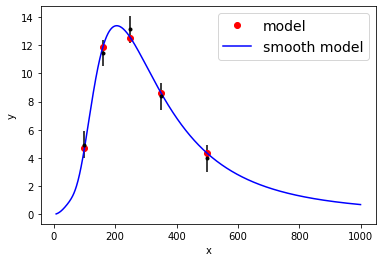

In [75]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x,GreybodyPL(x/(1.55),results_1.loc[16,'Tdust'],results_1.loc[16,'Norm'])*10**3, "or", label="model")
plt.plot(x_new,GreybodyPL(x_new/(1.55),results_1.loc[16,'Tdust'],results_1.loc[16,'Norm'])*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

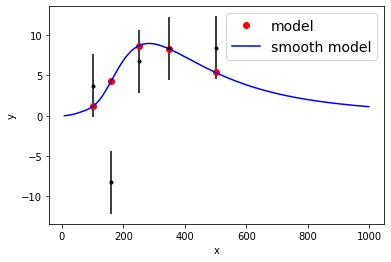

In [27]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[74,'100_flux(mJy)'],results.loc[74,'160_flux(mJy)'],results.loc[74,'250_flux(mJy)'],results.loc[74,'350_flux(mJy)'],results.loc[74,'500_flux(mJy)']])
yerr = np.array([results.loc[74,'100_std(mJy)'],results.loc[74,'160_std(mJy)'],results.loc[74,'250_std(mJy)'],results.loc[74,'350_std(mJy)'],results.loc[74,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x,GreybodyPL(x/(1.55),results.loc[74,'Tdust'],results.loc[74,'Norm'])*10**3, "or", label="model")
plt.plot(x_new,GreybodyPL(x_new/(1.55),results.loc[74,'Tdust'],results.loc[74,'Norm'])*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [15]:
results.loc[(results['Type']=='QG')&(results['Median_mass']>11)]

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,SFR8_median,SFR40_median,SFR8_upper,SFR40_upper,SFR8_ratio,SFR8_ratio_unc,SFR40_ratio,SFR40_ratio_unc,IR_detected,Radio_detected
57,QG,10.95 - 11.1,11.017330,0.0 - 0.5,0.40565,620,0.057300,6.344918e-03,0.423398,5.240966e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371,44
58,QG,10.95 - 11.1,11.016455,0.5 - 1.0,0.77630,3393,0.041412,1.977778e-03,-0.050860,1.771643e-01,...,3.454631,2.517199,7.439047e-01,4.092406e-01,1.812807,0.400698,2.487917,0.423089,1728,125
59,QG,10.95 - 11.1,11.019373,1.0 - 1.5,1.17290,3721,0.038860,1.608147e-03,0.155751,1.768050e-01,...,7.641644,5.024274,2.798902e+00,1.222618e+00,2.021777,0.746456,3.075012,0.761812,1714,73
60,QG,11.1 - 11.25,11.162854,0.0 - 0.5,0.40435,298,0.078098,8.308048e-03,0.747394,6.612929e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171,29
61,QG,11.1 - 11.25,11.158484,0.5 - 1.0,0.77185,1850,0.062410,3.065688e-03,0.846501,2.783415e-01,...,5.493735,3.818929,1.814313e+00,8.076335e-01,1.657478,0.554050,2.384371,0.519097,1010,142
62,QG,11.1 - 11.25,11.162594,1.0 - 1.5,1.19475,2242,0.055370,2.123345e-03,0.144282,2.497515e-01,...,8.724457,7.763573,1.237111e+00,9.873078e-01,2.583866,0.384540,2.903667,0.391882,1108,92
63,QG,11.25 - 11.4,11.323147,0.0 - 0.5,0.33620,128,0.042767,1.189546e-02,-0.613375,9.571231e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,7
64,QG,11.25 - 11.4,11.300543,0.5 - 1.0,0.78020,663,0.091774,6.074064e-03,1.143631,4.949113e-01,...,7.482241,4.780635,3.353481e+00,1.421984e+00,1.796471,0.814157,2.811683,0.857386,374,78
65,QG,11.25 - 11.4,11.304626,1.0 - 1.5,1.20440,913,0.054381,4.403346e-03,0.380790,3.571252e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441,50
66,QG,11.4 - 11.55,11.473045,0.0 - 0.5,0.32890,49,0.015403,1.457634e-02,0.840500,1.708406e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1


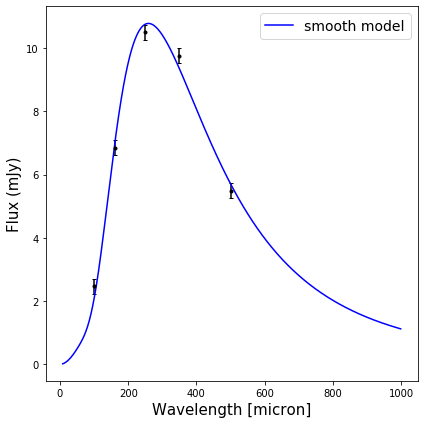

In [141]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[60,'100_flux(mJy)'],results.loc[60,'160_flux(mJy)'],results.loc[60,'250_flux(mJy)'],results.loc[60,'350_flux(mJy)'],results.loc[60,'500_flux(mJy)']])
yerr = np.array([results.loc[60,'100_std(mJy)'],results.loc[60,'160_std(mJy)'],results.loc[60,'250_std(mJy)'],results.loc[60,'350_std(mJy)'],results.loc[60,'500_std(mJy)']])
x_new = np.arange(8,1000)

fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar(x, y, yerr=yerr, fmt=".k", capsize=2)
#ax.plot(x,GreybodyPL(x/(1+results.loc[60,'Median_redshift']),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "or", label="model")
ax.plot(x_new,GreybodyPL(x_new/(1+results.loc[60,'Median_redshift']),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "b", label="smooth model")
ax.legend(fontsize=14)
#plt.xlim(0, 10)
ax.set_xlabel("Wavelength [micron]",size=15)
ax.set_ylabel("Flux (mJy)",size=15)
fig.tight_layout()
plt.show()

In [28]:
def Greybody(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for dust-dominated FIR regime
    given by an optically thick grey-body model
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    beta = 1.5
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1)
    return flux

In [29]:
def PL(x,Lc,Npl):
    '''Flux density in Jy at wavelength x in micron
    for PAH-dominated MIR regime
    given by a power-law
    Lc is the turnover wavelength 
    Nbl is a normalization parameter'''
    alpha = 2.0
    #flux = Npl*np.exp(-(x/(Lc*3/4))**2)*(x/Lc)**alpha
    flux = Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

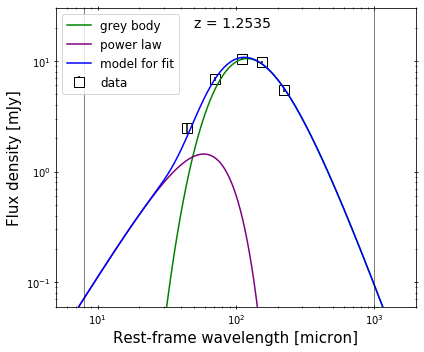

In [139]:
T = results.loc[60,'Tdust']
alpha = 2.0
beta = 1.5
Lc = (26.6764 + alpha*6.24629)**-2 + (1.9053*(10**-4) + alpha*7.24277*(10**-5))*T # 1/turnover_wavelength
Npl = results.loc[60,'Norm']*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)

x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[60,'100_flux(mJy)'],results.loc[60,'160_flux(mJy)'],results.loc[60,'250_flux(mJy)'],results.loc[60,'350_flux(mJy)'],results.loc[60,'500_flux(mJy)']])
yerr = np.array([results.loc[60,'100_std(mJy)'],results.loc[60,'160_std(mJy)'],results.loc[60,'250_std(mJy)'],results.loc[60,'350_std(mJy)'],results.loc[60,'500_std(mJy)']])
x_new = np.arange(8,5000)
z = results.loc[60,'Median_redshift']

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x_new/(1+z),Greybody(x_new/(1+z),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "g", label="grey body")
ax.plot(x_new/(1+z),PL(x_new/(1+z),Lc,Npl)*10**3,"purple",label='power law')
ax.plot(x_new/(1+z),GreybodyPL(x_new/(1+z),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "b", label="model for fit")
ax.errorbar(x/(1+z), y, yerr=yerr,fmt='s',mfc='w',mec='k',ms=10,ecolor='k',barsabove=True,capsize=0,label='data')
ax.axvline(8,0,1,lw=1,c='k',alpha=0.5)
ax.axvline(1000,0,1,lw=1,c='k',alpha=0.5)
ax.text(50,20,f'z = {z}',size=14)
ax.set_xlabel("Rest-frame wavelength [micron]",size=15)
ax.set_ylabel("Flux density [mJy]",size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=5,xmax=2000)
ax.set_ylim(ymin=0.06,ymax=30)
ax.tick_params(which='both',top=True,right=True,direction='inout')
ax.legend(fontsize=12,loc='upper left')
fig.tight_layout()
plt.show()

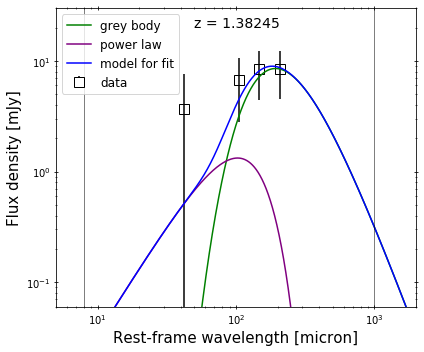

In [30]:
T = results.loc[74,'Tdust']
alpha = 2.0
beta = 1.5
Lc = (26.6764 + alpha*6.24629)**-2 + (1.9053*(10**-4) + alpha*7.24277*(10**-5))*T # 1/turnover_wavelength
Npl = results.loc[74,'Norm']*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)

x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[74,'100_flux(mJy)'],results.loc[74,'160_flux(mJy)'],results.loc[74,'250_flux(mJy)'],results.loc[74,'350_flux(mJy)'],results.loc[74,'500_flux(mJy)']])
yerr = np.array([results.loc[74,'100_std(mJy)'],results.loc[74,'160_std(mJy)'],results.loc[74,'250_std(mJy)'],results.loc[74,'350_std(mJy)'],results.loc[74,'500_std(mJy)']])
x_new = np.arange(8,5000)
z = results.loc[74,'Median_redshift']

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x_new/(1+z),Greybody(x_new/(1+z),results.loc[74,'Tdust'],results.loc[74,'Norm'])*10**3, "g", label="grey body")
ax.plot(x_new/(1+z),PL(x_new/(1+z),Lc,Npl)*10**3,"purple",label='power law')
ax.plot(x_new/(1+z),GreybodyPL(x_new/(1+z),results.loc[74,'Tdust'],results.loc[74,'Norm'])*10**3, "b", label="model for fit")
ax.errorbar(x/(1+z), y, yerr=yerr,fmt='s',mfc='w',mec='k',ms=10,ecolor='k',barsabove=True,capsize=0,label='data')
ax.axvline(8,0,1,lw=1,c='k',alpha=0.5)
ax.axvline(1000,0,1,lw=1,c='k',alpha=0.5)
ax.text(50,20,f'z = {z}',size=14)
ax.set_xlabel("Rest-frame wavelength [micron]",size=15)
ax.set_ylabel("Flux density [mJy]",size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=5,xmax=2000)
ax.set_ylim(ymin=0.06,ymax=30)
ax.tick_params(which='both',top=True,right=True,direction='inout')
ax.legend(fontsize=12,loc='upper left')
fig.tight_layout()
plt.show()

## Using emcee to estimate uncertainties on SFR derived from Herschel stacking


In [16]:
def model(theta,x):
    T, Nbb = theta
    a = 2.0
    b = 1.5
    Lc = (26.68 + a*6.246)**-2 + (1.905*(10**-4) + a*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
    return flux

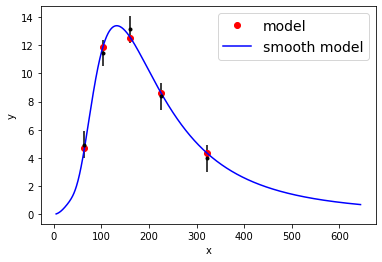

In [76]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x/1.55, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x/1.55,model((results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']),x/(1.55))*10**3, "or", label="model")
plt.plot(x_new/1.55,model((results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']),x_new/(1.55))*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [17]:
def log_likelihood(theta, x, y, yerr):
    model1 = model(theta,x)    
    lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )    
    return lnlike

In [18]:
def log_prior(theta):
    T, Nbb = theta
    if 0. < T < 100. and 0. < Nbb:
        return 0.0
    return -np.inf

In [19]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [78]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])
initial = np.array([results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']])
initial

array([3.00523876e+01, 1.28332979e+06])

In [102]:
ndim = len(initial)
nwalkers = 32
p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x/1.55, y/1000, yerr/1000))
sampler.run_mcmc(p0, 5000, progress=True);

100%|██████████| 5000/5000 [00:29<00:00, 171.72it/s]


In [114]:
tau = sampler.get_autocorr_time()
print(tau)

flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
print(flat_samples.shape)

(9792, 2)


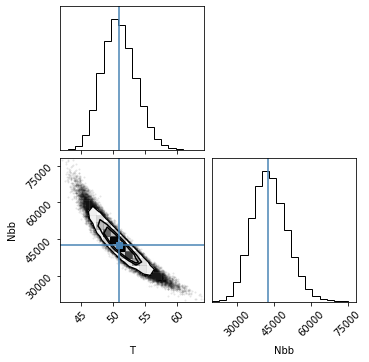

In [54]:
fig = corner.corner(
    flat_samples, labels=labels, truths=[results_1.loc[14,'Tdust'],results_1.loc[14,'Norm']]
);

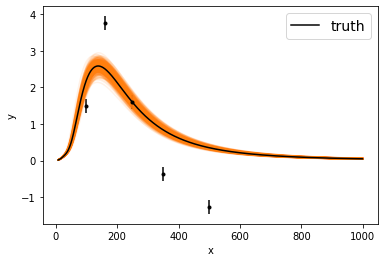

In [64]:
inds = np.random.randint(len(flat_samples), size=500)
x_new = np.arange(8,1000)
for ind in inds:
    sample = flat_samples[ind]
    #print(sample)
    plt.plot(x_new, model(([sample[0],sample[1]]),x_new/1.55)*1000, "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k")#, capsize=0)
plt.plot(x_new,model((results_1.loc[14,'Tdust'],results_1.loc[14,'Norm']),x_new/1.55)*1000, "k", label="truth")
plt.legend(fontsize=14,loc='upper right')
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [61]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[74,'100_flux(mJy)'],results.loc[74,'160_flux(mJy)'],results.loc[74,'250_flux(mJy)'],results.loc[74,'350_flux(mJy)'],results.loc[74,'500_flux(mJy)']])
yerr = np.array([results.loc[74,'100_std(mJy)'],results.loc[74,'160_std(mJy)'],results.loc[74,'250_std(mJy)'],results.loc[74,'350_std(mJy)'],results.loc[74,'500_std(mJy)']])
#initial = np.array([results.loc[74,'Tdust'],results.loc[74,'Norm']])
initial = np.array([30,10**4])
initial

array([   30, 10000])

In [35]:
ndim = len(initial)
nwalkers = 64
p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x/(1+results.loc[74,'Median_redshift']), y/1000, yerr/1000))
sampler.run_mcmc(p0, 30000, progress=True);

  0%|          | 88/30000 [00:00<05:10, 96.25it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
  1%|▏         | 388/30000 [00:04<05:30, 89.69it/s] /home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
 25%|██▌       | 7553/30000 [01:05<03:02, 123.13it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 25%|██▌       | 7566/30000 [01:05<03:05, 120.93it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
 25%|██▌       | 7630/30000 [01:05<03:06, 119.91it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

ValueError: At least one parameter value was infinite

/home/bruno/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2039: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


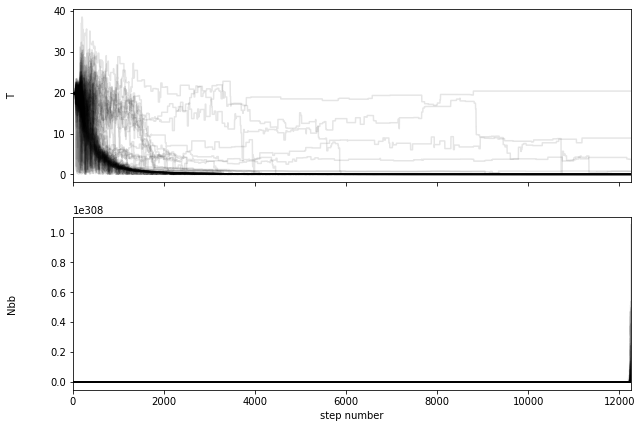

In [33]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["T", "Nbb"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [37]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[65,'100_flux(mJy)'],results.loc[65,'160_flux(mJy)'],results.loc[65,'250_flux(mJy)'],results.loc[65,'350_flux(mJy)'],results.loc[65,'500_flux(mJy)']])
yerr = np.array([results.loc[65,'100_std(mJy)'],results.loc[65,'160_std(mJy)'],results.loc[65,'250_std(mJy)'],results.loc[65,'350_std(mJy)'],results.loc[65,'500_std(mJy)']])
#initial = np.array([results.loc[65,'Tdust'],results.loc[65,'Norm']])
initial = np.array([30,10**4])
initial

array([   30, 10000])

In [38]:
ndim = len(initial)
nwalkers = 64
p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x/(1+results.loc[65,'Median_redshift']), y/1000, yerr/1000))
sampler.run_mcmc(p0, 30000, progress=True);

  0%|          | 67/30000 [00:00<05:24, 92.33it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
  4%|▍         | 1320/30000 [00:14<04:35, 104.02it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
100%|██████████| 30000/30000 [04:49<00:00, 103.47it/s]


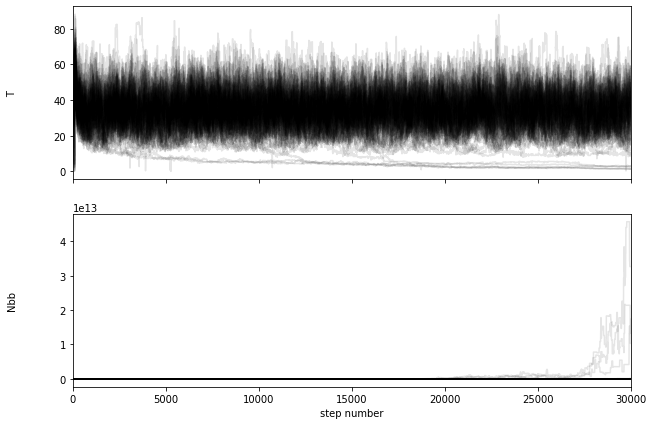

In [39]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["T", "Nbb"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [42]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 600;
tau: [830.24786843 863.81133633]

In [43]:
flat_samples = sampler.get_chain(flat=True)
print(flat_samples.shape)

(1920000, 2)


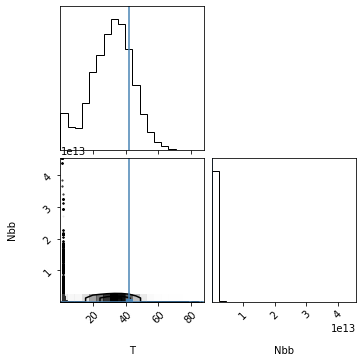

In [44]:
fig = corner.corner(
    flat_samples, labels=labels, truths=[results.loc[65,'Tdust'],results.loc[65,'Norm']]
);

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: R

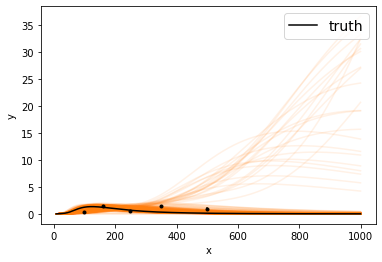

In [46]:
inds = np.random.randint(len(flat_samples), size=500)
x_new = np.arange(8,1000)
for ind in inds:
    sample = flat_samples[ind]
    #print(sample)
    plt.plot(x_new, model(([sample[0],sample[1]]),x_new/results.loc[65,'Median_redshift'])*1000, "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k")#, capsize=0)
plt.plot(x_new,model((results.loc[65,'Tdust'],results.loc[65,'Norm']),x_new/results.loc[65,'Median_redshift'])*1000, "k", label="truth")
plt.legend(fontsize=14,loc='upper right')
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [47]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [89]:
def SFR_MCMC(z_obj,Tdust,Norm,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
    
    if Norm<=0:
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        x = np.array([100.,160.,250.,350.,500.])/(1+z_obj) # shift wavelengths to rest-frame
        y = np.array([S1,S2,S3,S4,S5])*10**-3 # data is in mJy
        yerr = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3
        initial = np.array([Tdust,Norm])
        print('Initial values: ',initial)
    
        ndim = len(initial)
        nwalkers = 64
        p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]
        sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
        sampler.run_mcmc(p0, 30000, progress=True);
    
        tau = sampler.get_autocorr_time()
        print('Autocorrelation time: ',tau)
        flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
        print('Chain shape: ',flat_samples.shape)
    
        inds = np.random.randint(len(flat_samples), size=500)
        LIR_list8=[]
        LIR_list40=[]
        SFR_list8=[]
        SFR_list40=[]
        for ind in inds:
            sample = flat_samples[ind]
            dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
            integral8, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
            integral40, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),40,1000) # c/lambda^2 factor gives flux density per unit wavelength
            LIR8 = integral8*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6) #   c    *   Jy   * 1/micron
            LIR40 = integral40*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6) #   c    *   Jy   * 1/micron
            LIR_LSun8 = LIR8/(3.828*10**26)
            LIR_LSun40 = LIR40/(3.828*10**26)
            LIR_list8.append(np.log10(LIR8/(3.828*10**26)))
            LIR_list40.append(np.log10(LIR40/(3.828*10**26)))
            SFR_list8.append(LIR_LSun8/(1.7*5.8*10**9)) # Kennicutt 1998 + Man 2016
            SFR_list40.append(LIR_LSun40/(1.7*5.8*10**9))
        print('LIR: ',np.percentile(LIR_list8,[16,50,84]))
        print('SFR: ',np.percentile(SFR_list8,[16,50,84]))
        SFR_diff8 = np.diff(np.percentile(SFR_list8,[16,50,84]))
        SFR_diff40 = np.diff(np.percentile(SFR_list40,[16,50,84]))
        print('SFR diff: ',SFR_diff8,'\n')
        
        #return np.median(LIR_list), np.median(SFR_list), SFR_diff[0], SFR_diff[1]
        return np.median(LIR_list8), np.median(LIR_list40), np.median(SFR_list8), np.median(SFR_list40), SFR_diff8[1], SFR_diff40[1]

#SFR_MCMC_v = np.vectorize(SFR_MCMC)

In [95]:
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,Tdust,Norm,LIR_H,SFR_H,LIR8_median,LIR40_median,SFR8_median,SFR40_median,SFR8_upper,SFR40_upper
0,IRBQG,9.9 - 10.4,10.188737,0.5 - 1.0,0.73290,1,1.852234,3.827418e-16,-8.015293,0.000000e+00,...,32.880815,1.233539e+06,11.591895,39.629427,NaN,NaN,NaN,NaN,NaN,NaN
1,IRBQG,10.2 - 10.7,10.434191,0.5 - 1.0,0.70760,1,0.702044,1.913709e-16,-4.270449,8.673617e-16,...,9.878703,-8.404093e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IRBQG,10.2 - 10.7,10.289956,1.0 - 1.5,1.42520,5,0.043691,5.335709e-02,4.001256,8.333744e+00,...,30.391887,1.741927e+06,12.312093,208.073402,NaN,NaN,NaN,NaN,NaN,NaN
3,IRBQG,10.5 - 11.0,10.551246,0.5 - 1.0,0.83860,2,0.041980,6.070640e-02,11.881541,6.493317e+00,...,60.599638,1.777646e+05,11.905613,81.608598,12.030013,11.871073,108.676709,75.369792,4.345209e+01,2.233015e+01
4,IRBQG,10.5 - 11.0,10.690874,1.0 - 1.5,1.43720,26,0.070858,1.835444e-02,-0.538877,1.606186e+00,...,27.933458,1.194032e+06,12.001584,101.790535,12.070972,11.998185,119.424920,100.996942,1.430886e+01,1.088016e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,SFG,11.7 - 12.2,11.909817,0.0 - 0.5,0.40550,1,0.081672,1.196068e-17,-3.662153,2.168404e-15,...,23.132104,1.039167e+06,10.242778,1.773784,10.307581,10.242803,2.059226,1.773886,1.384705e-08,1.174708e-08
72,SFG,11.7 - 12.2,11.735640,0.5 - 1.0,0.67935,2,-0.005447,4.132612e-02,8.119149,4.968157e+00,...,60.319903,1.847121e+05,11.691017,49.789786,11.838729,11.672239,69.960373,47.682864,2.289963e+01,9.446658e+00
73,SFG,11.7 - 12.2,11.976331,1.0 - 1.5,1.34960,1,-0.160029,4.784272e-17,11.325651,1.734723e-15,...,60.119111,-9.571424e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,SFG,12.0 - 12.5,12.235741,1.0 - 1.5,1.42760,2,-0.048626,2.108978e-02,-8.485049,6.249148e+00,...,73.411269,-1.015171e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
for n in range(len(results)):
    try:
        results.loc[n,'LIR8_median'], results.loc[n,'LIR40_median'], results.loc[n,'SFR8_median'], results.loc[n,'SFR40_median'], results.loc[n,'SFR8_upper'], results.loc[n,'SFR40_upper'] = SFR_MCMC(results.loc[n,'Median_redshift'],results.loc[n,'Tdust'],results.loc[n,'Norm'],results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)'],results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)'])
        if (np.isnan(results.loc[n,'LIR_median'])):
            print('Negative value at : ',n,'\n')
        else:
            print('Success at : ',n,'\n')
    except:
        print('Failed at : ',n,'\n')

Initial values:  [3.28808149e+01 1.23353851e+06]


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
  0%|          | 0/10000 [00:00<?, ?it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [01:02<00:00, 158.89it/s]
/home/bruno/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
/home/bruno/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:41: RuntimeWarning: invalid value encountered in less
  m = np.arange(len(taus)) < c * taus
/home/bruno/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:99: RuntimeWarning: invalid value encountered in greater
  flag = tol * tau_est > n_t
/home/bruno/anaconda3/lib/python3.7/site-packages/em

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  0 

Initial values:  [5.43213818e+01 2.30061186e+05]


  1%|          | 105/10000 [00:00<00:58, 168.49it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
  2%|▏         | 159/10000 [00:00<00:56, 174.19it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
 61%|██████    | 6054/10000 [00:29<00:19, 202.38it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
 61%|██████    | 6075/10000 [00:29<00:19, 197.96it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 61%|██████    | 6095/10000 [00:29<00:22, 170.96it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarnin

Failed at :  1 

Failed at :  2 

Initial values:  [2.7708216e+01 3.9178295e+06]


100%|██████████| 10000/10000 [00:57<00:00, 175.05it/s]


Autocorrelation time:  [56.72179128 61.2099059 ]
Chain shape:  (11232, 2)


  0%|          | 16/10000 [00:00<01:07, 148.19it/s]

LIR:  [12.50182666 12.55478346 12.59775481]
SFR:  [322.06968855 363.83674618 401.67786413]
SFR diff:  [41.76705762 37.84111796] 

Failed at :  3 

Initial values:  [6.15275112e+01 1.66712840e+05]


  0%|          | 19/10000 [00:00<00:54, 182.74it/s]

Failed at :  4 

Initial values:  [3.46231968e+01 1.00427583e+06]


100%|██████████| 10000/10000 [00:56<00:00, 177.66it/s]


Autocorrelation time:  [72.25195221 83.2389221 ]
Chain shape:  (8672, 2)


  0%|          | 16/10000 [00:00<01:06, 149.92it/s]

LIR:  [12.271808   12.35517441 12.42904512]
SFR:  [189.64049858 229.77222533 272.3756838 ]
SFR diff:  [40.13172675 42.60345847] 

Failed at :  5 

Initial values:  [2.50755951e+01 1.48839983e+06]


  0%|          | 13/10000 [00:00<01:20, 124.31it/s]

Failed at :  6 

Initial values:  [4.11322760e+01 2.52289153e+06]


  0%|          | 14/10000 [00:00<01:11, 139.70it/s]

Failed at :  7 

Initial values:  [2.54534537e+01 8.27531983e+05]


  0%|          | 19/10000 [00:00<00:54, 182.58it/s]

Failed at :  8 

Initial values:  [3.63038569e+01 9.54217528e+05]


  0%|          | 18/10000 [00:00<00:56, 175.21it/s]

Failed at :  9 

Initial values:  [3.97592841e+01 5.04345674e+05]


100%|██████████| 10000/10000 [00:55<00:00, 181.09it/s]


Autocorrelation time:  [ 83.23984499 103.47096559]
Chain shape:  (7584, 2)


  0%|          | 16/10000 [00:00<01:02, 159.30it/s]

LIR:  [12.25284813 12.32422747 12.39135544]
SFR:  [181.53953389 213.9688531  249.73449299]
SFR diff:  [32.42931921 35.76563989] 

Failed at :  10 

Initial values:  [1.46010310e+01 8.87978731e+06]


  0%|          | 18/10000 [00:00<00:57, 175.04it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  11 

Initial values:  [3.47864402e+01 9.38104883e+05]


100%|██████████| 10000/10000 [00:55<00:00, 180.72it/s]


Autocorrelation time:  [55.61241098 62.68952254]
Chain shape:  (11648, 2)


  0%|          | 18/10000 [00:00<00:55, 179.44it/s]

LIR:  [12.29146674 12.35126275 12.40810725]
SFR:  [198.42205186 227.71196415 259.55579878]
SFR diff:  [29.28991229 31.84383463] 

Failed at :  12 

Initial values:  [8.75457625e+00 1.75641906e+08]


  0%|          | 18/10000 [00:00<00:56, 176.28it/s]

Failed at :  13 

Initial values:  [4.99323138e+01 3.17426165e+05]


100%|██████████| 10000/10000 [00:55<00:00, 179.06it/s]


Autocorrelation time:  [46.14549126 47.16620552]
Chain shape:  (13696, 2)


  0%|          | 16/10000 [00:00<01:03, 158.09it/s]

LIR:  [12.4539058  12.51058284 12.56649413]
SFR:  [288.42247158 328.62903126 373.7810008 ]
SFR diff:  [40.20655968 45.15196954] 

Failed at :  14 

Initial values:  [3.20535174e+01 3.66259174e+06]


  0%|          | 19/10000 [00:00<00:53, 185.09it/s]

Failed at :  15 

Initial values:  [4.09309229e+01 7.45240582e+05]


100%|██████████| 10000/10000 [00:55<00:00, 179.49it/s]


Autocorrelation time:  [43.81449274 44.46783292]
Chain shape:  (15008, 2)


  0%|          | 18/10000 [00:00<00:56, 177.30it/s]

LIR:  [12.50989856 12.56708838 12.61396453]
SFR:  [328.11165177 374.29279318 416.95362721]
SFR diff:  [46.18114141 42.66083403] 

Failed at :  16 

Initial values:  [3.33627393e+01 2.10963473e+06]


100%|██████████| 10000/10000 [00:56<00:00, 177.45it/s]


Failed at :  17 

Failed at :  18 

Failed at :  19 

Failed at :  20 

Failed at :  21 

Failed at :  22 

Failed at :  23 

Failed at :  24 

Failed at :  25 

Failed at :  26 

Failed at :  27 

Failed at :  28 

Initial values:  [nan nan]
Failed at :  29 

Failed at :  30 

Failed at :  31 

Failed at :  32 

Failed at :  33 

Failed at :  34 

Failed at :  35 

Failed at :  36 

Failed at :  37 

Failed at :  38 

Failed at :  39 

Failed at :  40 

Failed at :  41 

Failed at :  42 

Failed at :  43 

Failed at :  44 

Failed at :  45 

Failed at :  46 

Failed at :  47 

Failed at :  48 

Failed at :  49 

Failed at :  50 

Failed at :  51 

Failed at :  52 

Failed at :  53 

Failed at :  54 

Failed at :  55 

Failed at :  56 

Initial values:  [161.57755311 571.44382566]


  0%|          | 18/10000 [00:00<00:57, 173.42it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  57 

Initial values:  [   52.29940139 11492.37555074]


100%|██████████| 10000/10000 [00:55<00:00, 181.06it/s]


Autocorrelation time:  [43.79404617 42.81442677]
Chain shape:  (15008, 2)


  0%|          | 18/10000 [00:00<00:57, 172.50it/s]

LIR:  [10.44252857 10.53227861 10.61697479]
SFR:  [2.80964635 3.45463129 4.19853598]
SFR diff:  [0.64498494 0.7439047 ] 

Failed at :  58 

Initial values:  [  64.79764096 4102.28142215]


100%|██████████| 10000/10000 [00:53<00:00, 186.32it/s]


Autocorrelation time:  [75.15373029 95.274424  ]
Chain shape:  (8448, 2)


  1%|          | 63/10000 [00:00<00:15, 628.80it/s]

LIR:  [10.75198919 10.87706357 11.01259983]
SFR:  [ 5.72944486  7.64164374 10.44054588]
SFR diff:  [1.91219888 2.79890214] 

Failed at :  59 

Initial values:  [205.28258585 560.49188013]


  0%|          | 37/10000 [00:00<00:56, 175.54it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  60 

Initial values:  [   58.92431092 11724.92296723]


100%|██████████| 10000/10000 [00:54<00:00, 182.61it/s]


Autocorrelation time:  [78.0640114  77.64146407]
Chain shape:  (8000, 2)


  0%|          | 38/10000 [00:00<00:54, 181.13it/s]

LIR:  [10.61531647 10.73374461 10.85767825]
SFR:  [4.18253517 5.49373533 7.3080484 ]
SFR diff:  [1.31120016 1.81431307] 

Failed at :  61 

Initial values:  [1.94589148e+01 7.30649628e+05]


  0%|          | 18/10000 [00:00<00:57, 174.01it/s]

Failed at :  62 

Failed at :  63 

Initial values:  [  74.73618031 7094.69544105]


100%|██████████| 10000/10000 [00:52<00:00, 190.56it/s]


Autocorrelation time:  [82.09890525 98.84978345]
Chain shape:  (7584, 2)


  0%|          | 20/10000 [00:00<00:52, 191.23it/s]

LIR:  [10.66882863 10.86790838 11.02873475]
SFR:  [ 4.73099827  7.48224106 10.83572217]
SFR diff:  [2.75124279 3.35348111] 

Failed at :  64 

Initial values:  [   41.90768557 41648.39051221]


  1%|          | 63/10000 [00:00<00:15, 628.21it/s]

Failed at :  65 

Failed at :  66 

Initial values:  [232.85935011 651.55962695]


  0%|          | 18/10000 [00:00<00:57, 173.71it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  67 

Initial values:  [2.42386356e+01 6.95849638e+05]


100%|██████████| 10000/10000 [00:52<00:00, 189.16it/s]


Autocorrelation time:  [167.79391261 179.35600376]
Chain shape:  (3648, 2)


  0%|          | 19/10000 [00:00<00:55, 181.16it/s]

LIR:  [11.29197436 11.3832385  11.45387573]
SFR:  [19.86540701 24.51103276 28.8402362 ]
SFR diff:  [4.64562574 4.32920345] 

Failed at :  68 

Failed at :  69 

Failed at :  70 

Initial values:  [3.96369375e+01 2.88510190e+05]


  0%|          | 18/10000 [00:00<00:57, 173.65it/s]

Failed at :  71 

Failed at :  72 

Failed at :  73 

Initial values:  [1.98119232e+01 3.96376580e+06]


  0%|          | 38/10000 [00:00<00:54, 183.87it/s]

Failed at :  74 

Failed at :  75 

Initial values:  [7.29878947e+01 1.26718518e+05]


100%|██████████| 10000/10000 [01:04<00:00, 154.48it/s]


Autocorrelation time:  [137.9781369  141.91546124]
Chain shape:  (4480, 2)


  0%|          | 38/10000 [00:00<00:54, 182.87it/s]

LIR:  [11.81802934 11.81802934 11.81802934]
SFR:  [66.7040833  66.70408352 66.70408374]
SFR diff:  [2.21480803e-07 2.25057860e-07] 

Failed at :  76 

Failed at :  77 

Initial values:  [1.71898625e+01 1.39823268e+07]


  1%|          | 58/10000 [00:00<00:17, 577.51it/s]

Failed at :  78 

Failed at :  79 

Failed at :  80 

Failed at :  81 

Failed at :  82 

Failed at :  83 

Failed at :  84 

Initial values:  [ 114.80919264 1505.26119522]


  1%|          | 57/10000 [00:00<00:17, 565.50it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  85 

Failed at :  86 

Failed at :  87 

Initial values:  [219.38037162 690.71651696]


  0%|          | 16/10000 [00:00<01:05, 153.47it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  88 

Failed at :  89 

Failed at :  90 

Initial values:  [  75.99520588 8436.48977237]


100%|██████████| 10000/10000 [00:55<00:00, 180.44it/s]


Autocorrelation time:  [52.85964031 53.0185852 ]
Chain shape:  (12096, 2)


  0%|          | 35/10000 [00:00<01:03, 156.90it/s]

LIR:  [10.24280142 10.32844947 10.43776255]
SFR:  [1.7738811  2.16059172 2.77898564]
SFR diff:  [0.38671062 0.61839393] 

Failed at :  91 

Failed at :  92 

Failed at :  93 

Initial values:  [   55.94901845 36143.11133529]


100%|██████████| 10000/10000 [00:57<00:00, 173.92it/s]


Autocorrelation time:  [35.32194495 35.17012452]
Chain shape:  (18624, 2)


  0%|          | 18/10000 [00:00<00:56, 177.25it/s]

LIR:  [10.40572425 10.44550353 10.48143473]
SFR:  [2.58135263 2.82895909 3.07296645]
SFR diff:  [0.24760646 0.24400735] 

Failed at :  94 

Failed at :  95 

Failed at :  96 

Initial values:  [5.01387118e+01 6.21343609e+04]


100%|██████████| 10000/10000 [00:57<00:00, 174.87it/s]


Autocorrelation time:  [37.12341198 37.12218125]
Chain shape:  (17568, 2)


  0%|          | 18/10000 [00:00<00:57, 174.54it/s]

LIR:  [10.44337111 10.47498577 10.50459598]
SFR:  [2.81510237 3.02767225 3.24129878]
SFR diff:  [0.21256988 0.21362653] 

Failed at :  97 

Failed at :  98 

Failed at :  99 

Initial values:  [4.03807861e+01 2.09713772e+05]


100%|██████████| 10000/10000 [00:57<00:00, 172.52it/s]


Autocorrelation time:  [31.73102693 32.32755097]
Chain shape:  (21120, 2)


  1%|          | 54/10000 [00:00<00:18, 532.94it/s]

LIR:  [10.58911608 10.60578644 10.61968874]
SFR:  [3.93767044 4.0917541  4.22485528]
SFR diff:  [0.15408366 0.13310118] 

Failed at :  100 

Initial values:  [ 104.9804288  1675.47155647]


  0%|          | 18/10000 [00:00<00:59, 166.38it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  101 

Failed at :  102 

Initial values:  [3.83487705e+01 3.21148076e+05]


100%|██████████| 10000/10000 [00:57<00:00, 175.23it/s]


Autocorrelation time:  [32.1321108 32.1672247]
Chain shape:  (19808, 2)


  0%|          | 18/10000 [00:00<00:59, 168.08it/s]

LIR:  [10.68843975 10.70260432 10.71569407]
SFR:  [4.9495172  5.11360765 5.27007956]
SFR diff:  [0.16409045 0.15647192] 

Failed at :  103 

Initial values:  [   61.98910477 15856.32574448]


100%|██████████| 10000/10000 [00:56<00:00, 176.41it/s]


Autocorrelation time:  [34.94366672 34.99557896]
Chain shape:  (18624, 2)


  0%|          | 18/10000 [00:00<00:58, 171.57it/s]

LIR:  [10.99635528 11.02554053 11.05390952]
SFR:  [10.05722958 10.75631748 11.48239975]
SFR diff:  [0.69908789 0.72608228] 

Failed at :  104 

Initial values:  [  71.32653268 5443.57463749]


100%|██████████| 10000/10000 [00:56<00:00, 178.08it/s]


Autocorrelation time:  [42.06822705 43.13330718]
Chain shape:  (15040, 2)


  0%|          | 18/10000 [00:00<00:57, 173.37it/s]

LIR:  [11.16304759 11.22486622 11.28383621]
SFR:  [14.76286668 17.02116793 19.49662048]
SFR diff:  [2.25830125 2.47545254] 

Failed at :  105 

Initial values:  [3.52105385e+01 5.48797615e+05]


100%|██████████| 10000/10000 [00:57<00:00, 174.84it/s]


Autocorrelation time:  [31.78958077 31.79130245]
Chain shape:  (21120, 2)


  0%|          | 18/10000 [00:00<00:56, 176.18it/s]

LIR:  [10.76804666 10.77869226 10.79035445]
SFR:  [5.9452451  6.09277799 6.25860486]
SFR diff:  [0.14753289 0.16582688] 

Failed at :  106 

Initial values:  [4.96601233e+01 4.97748852e+04]


100%|██████████| 10000/10000 [00:56<00:00, 177.09it/s]


Autocorrelation time:  [31.5817152  32.26672835]
Chain shape:  (21120, 2)


  0%|          | 16/10000 [00:00<01:03, 156.69it/s]

LIR:  [11.11900095 11.13496837 11.15013804]
SFR:  [13.33902335 13.83857804 14.3304928 ]
SFR diff:  [0.49955469 0.49191477] 

Failed at :  107 

Initial values:  [   61.47218882 14725.52895983]


100%|██████████| 10000/10000 [00:56<00:00, 177.15it/s]


Autocorrelation time:  [36.01165686 35.78971277]
Chain shape:  (17568, 2)


  0%|          | 19/10000 [00:00<00:53, 185.61it/s]

LIR:  [11.3720737  11.40082029 11.43118155]
SFR:  [23.88893594 25.52368528 27.37188071]
SFR diff:  [1.63474934 1.84819543] 

Failed at :  108 

Initial values:  [3.34250062e+01 7.75733925e+05]


100%|██████████| 10000/10000 [00:57<00:00, 175.09it/s]


Autocorrelation time:  [32.85571562 33.14329724]
Chain shape:  (19776, 2)


  0%|          | 17/10000 [00:00<00:59, 167.85it/s]

LIR:  [10.8258225  10.8360282  10.84820126]
SFR:  [6.79118544 6.95266478 7.1503013 ]
SFR diff:  [0.16147933 0.19763653] 

Failed at :  109 

Initial values:  [4.43431862e+01 1.02252494e+05]


100%|██████████| 10000/10000 [00:56<00:00, 176.26it/s]


Autocorrelation time:  [32.45709494 32.10033262]
Chain shape:  (19776, 2)


  0%|          | 18/10000 [00:00<00:57, 174.22it/s]

LIR:  [11.23102857 11.24512227 11.26092881]
SFR:  [17.26440672 17.83386047 18.49489604]
SFR diff:  [0.56945375 0.66103557] 

Failed at :  110 

Initial values:  [4.58597087e+01 6.05933074e+04]


100%|██████████| 10000/10000 [00:57<00:00, 175.40it/s]


Autocorrelation time:  [33.58367281 33.37148246]
Chain shape:  (19776, 2)


  0%|          | 17/10000 [00:00<01:00, 166.13it/s]

LIR:  [11.48127913 11.50240652 11.52428798]
SFR:  [30.71865639 32.24999155 33.91650317]
SFR diff:  [1.53133515 1.66651162] 

Failed at :  111 

Initial values:  [3.4262493e+01 7.7107817e+05]


100%|██████████| 10000/10000 [00:56<00:00, 176.22it/s]


Autocorrelation time:  [32.9327521  32.63606865]
Chain shape:  (19776, 2)


  0%|          | 18/10000 [00:00<00:58, 171.89it/s]

LIR:  [10.86232628 10.87661925 10.89024883]
SFR:  [7.38668139 7.63382743 7.87720073]
SFR diff:  [0.24714603 0.24337331] 

Failed at :  112 

Initial values:  [3.81330912e+01 2.72417435e+05]


100%|██████████| 10000/10000 [00:56<00:00, 175.56it/s]


Autocorrelation time:  [32.93425626 32.22827826]
Chain shape:  (19776, 2)


  0%|          | 20/10000 [00:00<00:52, 190.54it/s]

LIR:  [11.38963602 11.39869122 11.40756523]
SFR:  [24.87477158 25.39886486 25.92318248]
SFR diff:  [0.52409328 0.52431761] 

Failed at :  113 

Initial values:  [4.06978348e+01 1.47058018e+05]


100%|██████████| 10000/10000 [00:56<00:00, 176.37it/s]


Autocorrelation time:  [32.60952449 32.48030938]
Chain shape:  (19776, 2)


  0%|          | 17/10000 [00:00<00:59, 166.50it/s]

LIR:  [11.66705784 11.6813204  11.69528887]
SFR:  [47.11735795 48.69041608 50.28193235]
SFR diff:  [1.57305813 1.59151627] 

Failed at :  114 

Initial values:  [3.16428848e+01 1.15544347e+06]


100%|██████████| 10000/10000 [00:56<00:00, 177.03it/s]


Autocorrelation time:  [32.15308073 32.44028852]
Chain shape:  (19808, 2)


  0%|          | 18/10000 [00:00<00:58, 171.89it/s]

LIR:  [10.90628613 10.92477849 10.94058377]
SFR:  [8.17352163 8.52906791 8.84518375]
SFR diff:  [0.35554628 0.31611584] 

Failed at :  115 

Initial values:  [3.65728931e+01 3.96438161e+05]


100%|██████████| 10000/10000 [00:56<00:00, 177.42it/s]


Autocorrelation time:  [31.34696838 31.58387628]
Chain shape:  (21120, 2)


  0%|          | 18/10000 [00:00<00:58, 172.00it/s]

LIR:  [11.48099686 11.49027032 11.4996133 ]
SFR:  [30.69869712 31.361253   32.04323749]
SFR diff:  [0.66255589 0.68198449] 

Failed at :  116 

Initial values:  [4.05712693e+01 2.28940418e+05]


100%|██████████| 10000/10000 [00:56<00:00, 175.45it/s]


Autocorrelation time:  [31.58734204 31.47284437]
Chain shape:  (21120, 2)


  0%|          | 36/10000 [00:00<01:00, 164.05it/s]

LIR:  [11.86822859 11.87788984 11.88915857]
SFR:  [74.87755772 76.56193932 78.57450491]
SFR diff:  [1.68438159 2.01256559] 

Failed at :  117 

Initial values:  [2.75459888e+01 1.82556441e+06]


100%|██████████| 10000/10000 [00:57<00:00, 174.74it/s]


Autocorrelation time:  [38.15897129 38.39133418]
Chain shape:  (16640, 2)


  0%|          | 18/10000 [00:00<00:55, 178.50it/s]

LIR:  [10.85864745 10.88866584 10.91806097]
SFR:  [7.32437463 7.8485417  8.39815827]
SFR diff:  [0.52416707 0.54961657] 

Failed at :  118 

Initial values:  [3.41426027e+01 6.35135039e+05]


100%|██████████| 10000/10000 [00:57<00:00, 175.13it/s]


Autocorrelation time:  [31.7767604  32.15581965]
Chain shape:  (21120, 2)


  0%|          | 17/10000 [00:00<01:00, 164.22it/s]

LIR:  [11.56659826 11.57948977 11.59285913]
SFR:  [37.38706283 38.51348937 39.71752882]
SFR diff:  [1.12642654 1.20403945] 

Failed at :  119 

Initial values:  [3.82956191e+01 3.76986126e+05]


100%|██████████| 10000/10000 [00:56<00:00, 176.83it/s]


Autocorrelation time:  [33.22584524 32.83140566]
Chain shape:  (19776, 2)


  0%|          | 17/10000 [00:00<00:59, 167.70it/s]

LIR:  [11.99576379 12.00652348 12.01636876]
SFR:  [100.43541508 102.95479193 105.31539187]
SFR diff:  [2.51937685 2.36059995] 

Failed at :  120 

Initial values:  [3.11358864e+01 1.39660502e+06]


100%|██████████| 10000/10000 [00:56<00:00, 176.60it/s]


Autocorrelation time:  [44.69420486 46.98198434]
Chain shape:  (14336, 2)


  0%|          | 17/10000 [00:00<00:58, 169.51it/s]

LIR:  [10.94236068 10.99514434 11.05078046]
SFR:  [ 8.88145215 10.02922734 11.39996567]
SFR diff:  [1.14777519 1.37073833] 

Failed at :  121 

Initial values:  [3.57650871e+01 6.99636995e+05]


100%|██████████| 10000/10000 [00:57<00:00, 175.44it/s]


Autocorrelation time:  [32.19339506 32.75156683]
Chain shape:  (19808, 2)


  0%|          | 18/10000 [00:00<00:56, 176.62it/s]

LIR:  [11.70430311 11.72199014 11.73775907]
SFR:  [51.3364925  53.47037476 55.44752403]
SFR diff:  [2.13388226 1.97714927] 

Failed at :  122 

Initial values:  [3.58108146e+01 6.39372135e+05]


100%|██████████| 10000/10000 [00:56<00:00, 176.78it/s]


Autocorrelation time:  [32.50858052 32.59996277]
Chain shape:  (19776, 2)


  0%|          | 37/10000 [00:00<00:55, 180.93it/s]

LIR:  [12.11901396 12.13012659 12.14262085]
SFR:  [133.39423136 136.85153502 140.84581172]
SFR diff:  [3.45730366 3.9942767 ] 

Failed at :  123 

Initial values:  [2.11886873e+01 5.36528207e+06]


100%|██████████| 10000/10000 [00:52<00:00, 189.52it/s]


Autocorrelation time:  [133.43350037 156.70318704]
Chain shape:  (4640, 2)


  0%|          | 18/10000 [00:00<00:55, 179.34it/s]

LIR:  [10.22117689 10.40665413 10.52494199]
SFR:  [1.68772672 2.58688578 3.39676642]
SFR diff:  [0.89915907 0.80988064] 

Failed at :  124 

Initial values:  [3.85062202e+01 6.11752951e+05]


100%|██████████| 10000/10000 [00:56<00:00, 176.30it/s]


Autocorrelation time:  [40.728326   40.54865825]
Chain shape:  (15776, 2)


  0%|          | 17/10000 [00:00<00:59, 166.49it/s]

LIR:  [11.76744004 11.80994265 11.84733414]
SFR:  [59.36947312 65.47352611 71.36039255]
SFR diff:  [6.10405298 5.88686645] 

Failed at :  125 

Initial values:  [3.44282347e+01 7.07049955e+05]


100%|██████████| 10000/10000 [00:57<00:00, 175.15it/s]


Autocorrelation time:  [35.22213124 34.71277695]
Chain shape:  (18624, 2)


  0%|          | 20/10000 [00:00<00:53, 185.96it/s]

LIR:  [12.09778343 12.12083318 12.14338299]
SFR:  [127.03006542 133.95417729 141.09319699]
SFR diff:  [6.92411187 7.1390197 ] 

Failed at :  126 

Initial values:  [3.03760207e+01 1.89799379e+06]


  0%|          | 17/10000 [00:00<01:00, 163.87it/s]

Failed at :  127 

Initial values:  [3.92052835e+01 9.20601654e+05]


  0%|          | 18/10000 [00:00<00:58, 171.51it/s]

Failed at :  128 

Initial values:  [3.05202270e+01 1.38264545e+06]


100%|██████████| 10000/10000 [00:57<00:00, 173.84it/s]


Autocorrelation time:  [57.91320121 62.33755963]
Chain shape:  (11200, 2)


  0%|          | 17/10000 [00:00<00:59, 167.44it/s]

LIR:  [12.15633686 12.21192078 12.26589494]
SFR:  [145.36503191 165.2128795  187.07598067]
SFR diff:  [19.8478476  21.86310116] 

Failed at :  129 

Initial values:  [4.97019148e+01 1.30170146e+05]


100%|██████████| 10000/10000 [00:56<00:00, 177.81it/s]


Autocorrelation time:  [36.19930802 36.15895589]
Chain shape:  (17568, 2)


  0%|          | 18/10000 [00:00<00:57, 173.58it/s]

LIR:  [11.20661648 11.27530255 11.33744011]
SFR:  [16.32072945 19.11726405 22.05785479]
SFR diff:  [2.7965346  2.94059074] 

Failed at :  130 

Initial values:  [3.54303593e+01 7.87000231e+05]


100%|██████████| 10000/10000 [00:55<00:00, 179.62it/s]


Autocorrelation time:  [78.86078227 87.70056453]
Chain shape:  (8000, 2)


  0%|          | 17/10000 [00:00<01:00, 165.01it/s]

LIR:  [12.17955674 12.2606707  12.33860441]
SFR:  [153.34860347 184.83930687 221.17066962]
SFR diff:  [31.4907034  36.33136275] 

Failed at :  131 

Initial values:  [6.06379130e+01 1.81861308e+05]


100%|██████████| 10000/10000 [00:54<00:00, 183.51it/s]


Autocorrelation time:  [64.16684787 66.19697193]
Chain shape:  (9792, 2)


  0%|          | 18/10000 [00:00<00:57, 174.85it/s]

LIR:  [11.718893   11.85226446 11.96994423]
SFR:  [53.09043482 72.17514241 94.6385365 ]
SFR diff:  [19.08470759 22.46339409] 

Failed at :  132 

Initial values:  [2.31321041e+01 1.03916683e+06]


100%|██████████| 10000/10000 [00:56<00:00, 178.30it/s]


Autocorrelation time:  [127.60113386 149.54774968]
Chain shape:  (4864, 2)
LIR:  [10.307581   10.30758101 10.30758101]
SFR:  [2.05922635 2.05922637 2.05922639]
SFR diff:  [1.77025545e-08 1.37497080e-08] 

Failed at :  133 

Failed at :  134 

Failed at :  135 

Failed at :  136 



In [20]:
results.loc[(results['Type']=='QG')&(results['Median_mass']>11),['Type','Mass_range','Redshift_range','Count','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H','SFR8_median','Radio_detected']]

,Type,Mass_range,Redshift_range,Count,500_flux(mJy),Tdust,Norm,LIR_H,SFR_H,SFR8_median,Radio_detected
57,QG,10.95 - 11.1,0.0 - 0.5,620,-1.052853,161.577553,5.714438e+02,9.773397,0.601894,NaN,44
58,QG,10.95 - 11.1,0.5 - 1.0,3393,-0.322518,52.299401,1.149238e+04,10.409613,2.604570,3.454631,125
59,QG,10.95 - 11.1,1.0 - 1.5,3721,0.104220,64.797641,4.102281e+03,10.725787,5.393984,7.641644,73
60,QG,11.1 - 11.25,0.0 - 0.5,298,-1.746246,205.282586,5.604919e+02,9.956802,0.918175,NaN,29
61,QG,11.1 - 11.25,0.5 - 1.0,1850,0.158927,58.924311,1.172492e+04,10.594759,3.989170,5.493735,142
62,QG,11.1 - 11.25,1.0 - 1.5,2242,1.553499,19.458915,7.306496e+05,10.895673,7.976209,8.724457,92
63,QG,11.25 - 11.4,0.0 - 0.5,128,-3.260029,21.045306,-1.627315e+06,NaN,NaN,NaN,7
64,QG,11.25 - 11.4,0.5 - 1.0,663,-0.515899,74.736180,7.094695e+03,10.722320,5.351101,7.482241,78
65,QG,11.25 - 11.4,1.0 - 1.5,913,0.951181,41.907686,4.164839e+04,11.077410,12.120842,NaN,50
66,QG,11.4 - 11.55,0.0 - 0.5,49,0.660265,23.027960,-2.260385e+05,NaN,NaN,NaN,1


In [24]:
results.loc[(results['Type']=='SFG')&(results['Median_mass']>11),['Type','Mass_range','Redshift_range','Count','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H','SFR8_median','Radio_detected']]

,Type,Mass_range,Redshift_range,Count,500_flux(mJy),Tdust,Norm,LIR_H,SFR_H,SFR8_median,Radio_detected
119,SFG,10.95 - 11.1,0.5 - 1.0,1409,3.196442,34.142603,6.351350e+05,11.491066,31.418750,38.513489,345
120,SFG,10.95 - 11.1,1.0 - 1.5,2304,4.472415,38.295619,3.769861e+05,11.908551,82.162639,102.954792,375
121,SFG,11.1 - 11.25,0.0 - 0.5,41,3.831743,31.135886,1.396605e+06,10.925271,8.538742,10.029227,14
122,SFG,11.1 - 11.25,0.5 - 1.0,406,4.630212,35.765087,6.996370e+05,11.631737,43.437036,53.470375,136
123,SFG,11.1 - 11.25,1.0 - 1.5,953,6.058775,35.810815,6.393721e+05,12.039437,111.060561,136.851535,249
124,SFG,11.25 - 11.4,0.0 - 0.5,3,-0.400226,21.188687,5.365282e+06,10.413937,2.630634,2.586886,1
125,SFG,11.25 - 11.4,0.5 - 1.0,78,4.185673,38.506220,6.117530e+05,11.718964,53.099034,65.473526,30
126,SFG,11.25 - 11.4,1.0 - 1.5,259,5.968316,34.428235,7.070500e+05,12.035868,110.151726,133.954177,85
127,SFG,11.4 - 11.55,0.0 - 0.5,3,-1.713526,30.376021,1.897994e+06,10.895269,7.968780,NaN,0
128,SFG,11.4 - 11.55,0.5 - 1.0,7,14.358230,39.205284,9.206017e+05,11.919303,84.222074,NaN,1


In [93]:
results.loc[74,'LIR8_median'], results.loc[74,'LIR40_median'], results.loc[74,'SFR8_median'], results.loc[74,'SFR40_median'], results.loc[74,'SFR8_upper'], results.loc[74,'SFR40_upper'] = SFR_MCMC(results.loc[74,'Median_redshift'],results.loc[74,'Tdust'],results.loc[74,'Norm'],results.loc[74,'100_flux(mJy)'],results.loc[74,'160_flux(mJy)'],results.loc[74,'250_flux(mJy)'],results.loc[74,'350_flux(mJy)'],results.loc[74,'500_flux(mJy)'],results.loc[74,'100_std(mJy)'],results.loc[74,'160_std(mJy)'],results.loc[74,'250_std(mJy)'],results.loc[74,'350_std(mJy)'],results.loc[74,'500_std(mJy)'])

  0%|          | 0/30000 [00:00<?, ?it/s]

Initial values:  [1.98119232e+01 3.96376580e+06]


  0%|          | 97/30000 [00:01<06:42, 74.24it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
  2%|▏         | 695/30000 [00:07<04:29, 108.56it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
 26%|██▌       | 7674/30000 [01:04<03:18, 112.61it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
 26%|██▌       | 7698/30000 [01:04<03:25, 108.72it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 26%|██▌       | 7758/30000 [01:05<03:17, 112.67it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

ValueError: At least one parameter value was infinite

In [101]:
results['SFR8_ratio']=results['SFR_lofar']/results['SFR8_median']
results['SFR8_ratio_unc']=np.sqrt( (results['SFR8_ratio']**2)*((results['SFR_lofar_unc']/results['SFR_lofar'])**2 + (results['SFR8_upper']/results['SFR8_median'])**2) )
results['SFR40_ratio']=results['SFR_lofar']/results['SFR40_median']
results['SFR40_ratio_unc']=np.sqrt( (results['SFR40_ratio']**2)*((results['SFR_lofar_unc']/results['SFR_lofar'])**2 + (results['SFR40_upper']/results['SFR40_median'])**2) )

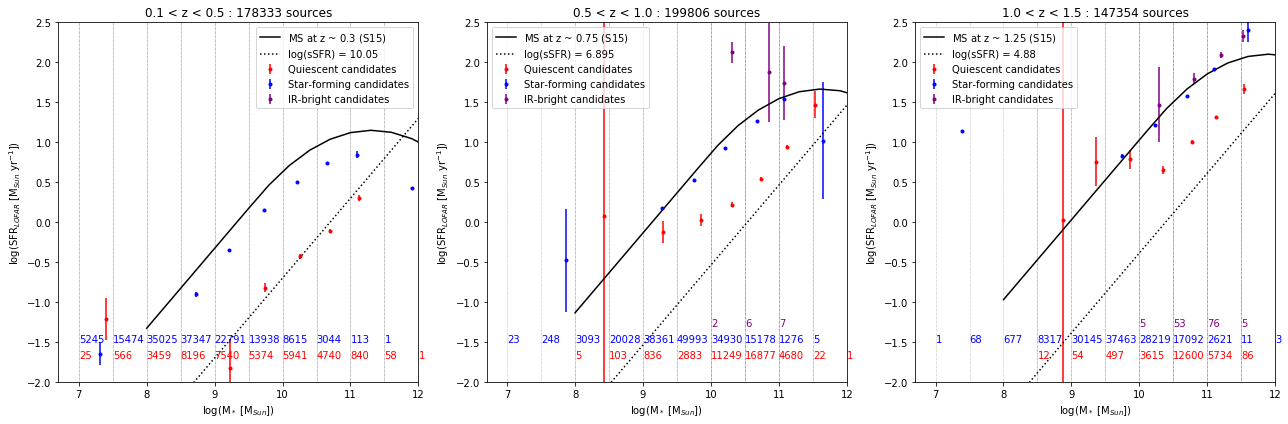

In [48]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age_1,age_2,age_3],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']),
                   yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_unc']/(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']),
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_unc']/(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']),
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_unc']/(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {age:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
    #axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

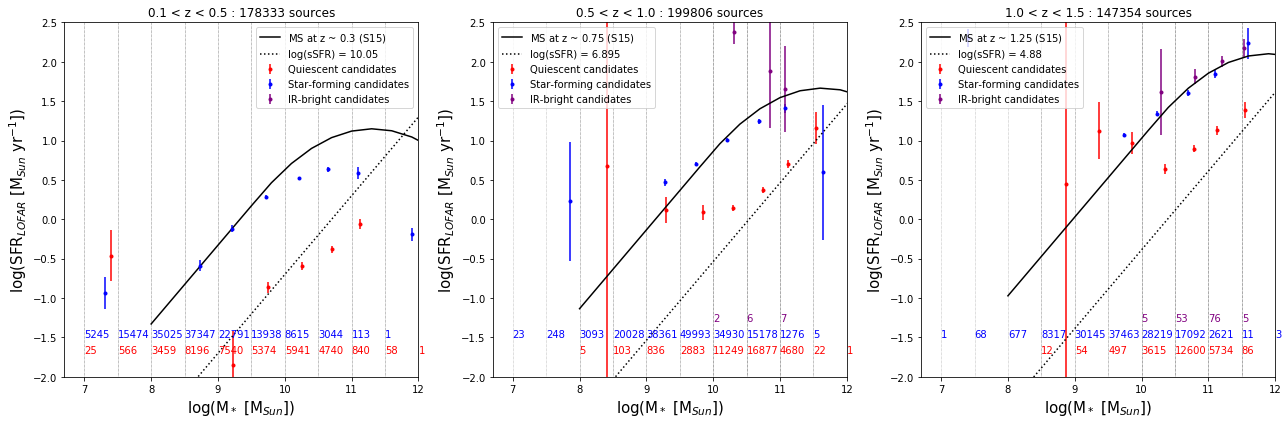

In [51]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age_1,age_2,age_3],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']),
                   yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M_unc']/(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']),
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M_unc']/(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']),
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M_unc']/(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {age:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
    #axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

In [79]:
results.loc[results['Type']=='SFG',['Type','Median_mass','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
34,SFG,7.313531,5245,-0.215213,-0.119695,-3.123322,-3.328230,-2.505588,11.387401,-1.359816e+07,NaN,NaN
35,SFG,7.395454,23,-1.603481,-3.979781,-2.814502,-2.986657,-3.450749,27.355017,-5.666048e+05,NaN,NaN
36,SFG,7.395524,1,-13.893229,-2.239126,-6.910786,-5.400008,-1.157762,248.255768,-3.453653e+03,NaN,NaN
37,SFG,7.813471,15474,-0.003861,-0.360550,-3.443856,-3.719418,-2.949751,11.782361,-1.338482e+07,NaN,NaN
38,SFG,7.864479,248,-0.241653,-3.320152,-4.318962,-5.024062,-3.824348,20.574197,-2.034956e+06,NaN,NaN
39,SFG,7.920468,68,-0.590137,-5.119051,-3.907211,-3.959586,-2.109997,43.548864,-1.329965e+05,NaN,NaN
40,SFG,8.283108,35025,-0.293177,-0.371848,-3.422526,-3.720376,-2.770338,12.809492,-9.327798e+06,NaN,NaN
41,SFG,8.386322,3093,-0.665982,-0.223288,-3.622995,-3.607883,-2.645434,16.806804,-3.103386e+06,NaN,NaN
42,SFG,8.364944,677,-0.327083,-1.376020,-4.282685,-4.317771,-2.973690,28.545819,-5.076226e+05,NaN,NaN
43,SFG,8.727292,37347,-0.033750,-0.054283,-2.723136,-3.044907,-2.259668,12.795738,-7.536576e+06,NaN,NaN


In [49]:
results.loc[results['Type']=='QG',['Type','Median_mass','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
7,QG,7.396254,25,2.142651,-0.918384,-1.450049,-2.196473,-1.760863,9.903583,-1.519727e+07,NaN,NaN
8,QG,7.878830,566,-0.469347,-1.548605,-4.205962,-4.225476,-3.127843,12.355275,-1.295639e+07,NaN,NaN
9,QG,8.330666,3459,-0.713437,-1.399611,-4.386699,-4.398244,-3.264557,12.610062,-1.236289e+07,NaN,NaN
10,QG,8.418305,5,7.485112,16.293940,10.316931,3.798884,-3.188293,44.782064,3.349559e+05,11.445926,28.317136
11,QG,8.774096,8196,-0.506248,-0.718568,-3.629884,-3.835489,-2.769702,12.509793,-1.070814e+07,NaN,NaN
12,QG,8.900928,103,-0.107663,2.501810,-4.109107,-4.473516,-4.037006,13.431518,-9.499821e+06,NaN,NaN
13,QG,8.873606,12,6.327036,8.191111,-3.981578,-6.227388,-7.100859,15.705466,-7.650154e+06,NaN,NaN
14,QG,9.222692,7540,-0.229001,-0.304992,-3.031185,-3.254304,-2.298415,12.417690,-9.164839e+06,NaN,NaN
15,QG,9.300395,836,-0.617940,0.743344,-2.730223,-3.115373,-2.246494,15.305761,-3.636780e+06,NaN,NaN
16,QG,9.363929,54,-1.372976,2.851619,-2.966707,-4.639767,-4.056477,18.010624,-2.903216e+06,NaN,NaN


In [103]:
results.to_csv(path+"Bootes/Bootes_stack_full_results_NDWFS_3.csv",index=False)

In [46]:
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,Tdust,Norm,LIR_H,SFR_H,LIR_median,SFR_median,SFR_lower,SFR_upper,SFR_ratio,SFR_ratio_unc
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,...,33.634575,3.221080e+05,11.117570,13.295151,11.104009,12.886405,2.701709e+00,2.678260e+00,10.393801,3.795748
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,...,34.254224,1.203903e+06,12.455823,289.698417,NaN,NaN,NaN,NaN,NaN,NaN
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,...,43.350520,7.910085e+05,12.185842,155.583906,NaN,NaN,NaN,NaN,NaN,NaN
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,...,29.926517,8.600684e+05,12.055358,115.207692,12.040085,111.226523,1.741421e+01,1.929039e+01,0.560091,0.132476
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,...,28.370336,1.893867e+06,11.818673,66.802953,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,...,36.259729,5.400867e+05,12.075225,120.600254,12.074674,120.447313,2.501175e+00,2.340716e+00,0.684602,0.028638
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,...,23.132104,1.039167e+06,10.307555,2.059103,10.307581,2.059226,1.538653e-08,1.560557e-08,1.312307,0.024424
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,...,45.643185,3.048674e+05,11.568974,37.592118,NaN,NaN,NaN,NaN,NaN,NaN
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,...,37.820399,4.900343e+05,12.189515,156.905335,12.147539,142.449788,2.975087e+01,3.947017e+01,1.788583,0.816820


# OLDER PLOTS
#### These plots are not currently in use, but may prove helpful in the future

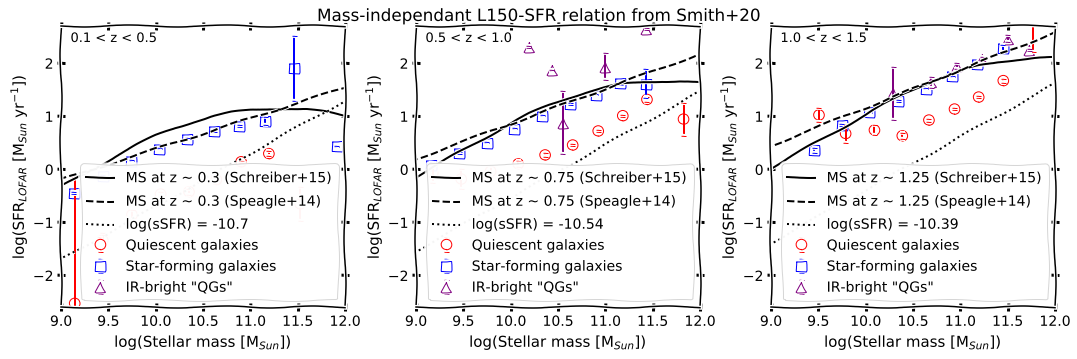

In [18]:
#%% Plotting Star formation rate vs Stellar mass
with plt.xkcd():
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
        z = (za+zb)/2
        logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
        age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
        factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
        data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
        axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
        axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
        axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                       np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                       fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
        axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                       np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                       fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
        axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                        np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                       fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
        axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
        axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
        axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
        count = data['Count'].sum()
        axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
        axs[i].set_ylim(ymin=-2.6,ymax=2.7)
        axs[i].set_xlim(xmin=9,xmax=12.)
        axs[i].tick_params(which='both',top=True,right=True,direction='inout')
        axs[i].legend(numpoints=1, loc='lower right')
    fig.suptitle('Mass-independant L150-SFR relation from Smith+20',y=1)
    fig.tight_layout()
plt.show()

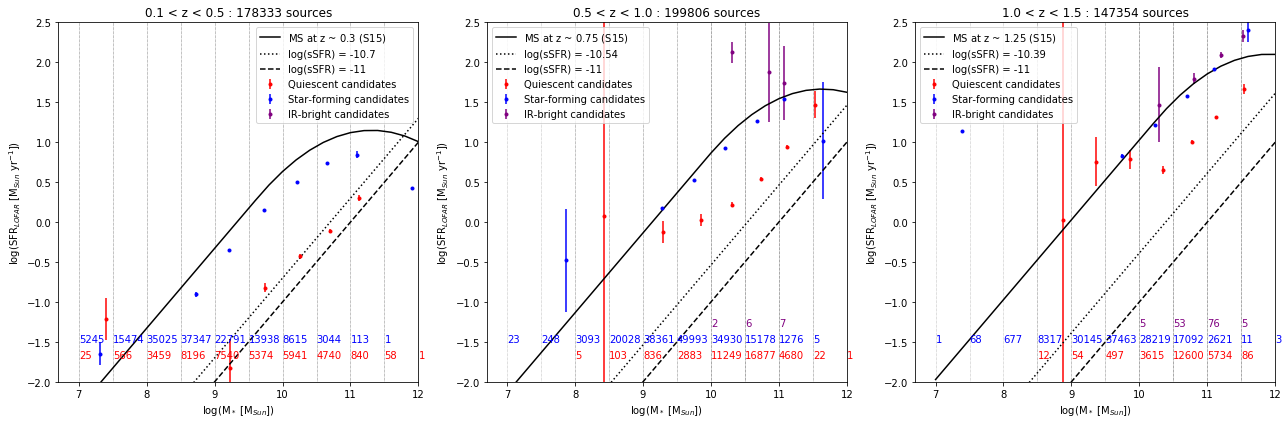

In [48]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age1,age2,age3],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                   data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${(za+zb)/2}$ (Speagle 14)')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = data['Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(data['Type'],data['Median_mass'],data['Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

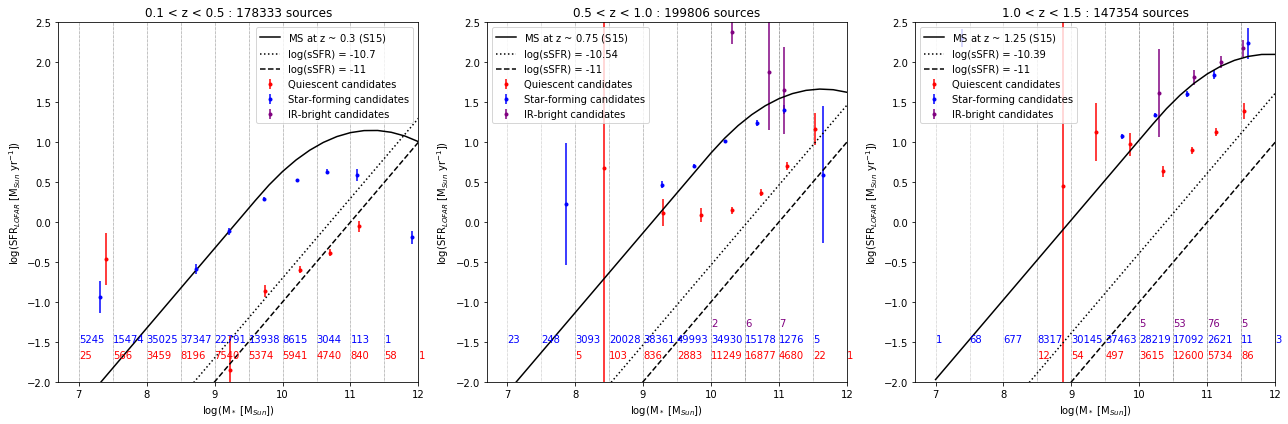

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age1,age2,age3],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${(za+zb)/2}$ (Speagle 14)')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = data['Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(data['Type'],data['Median_mass'],data['Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

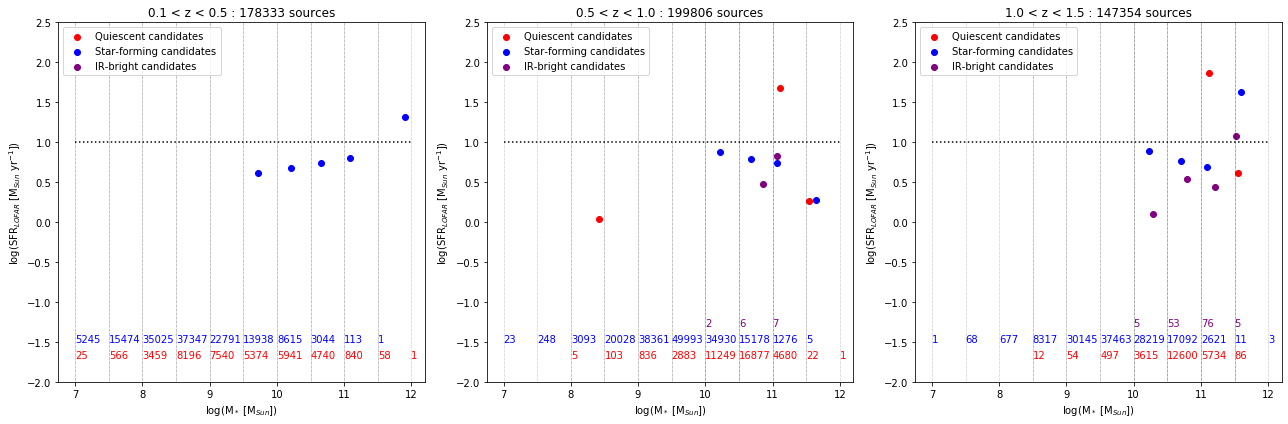

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

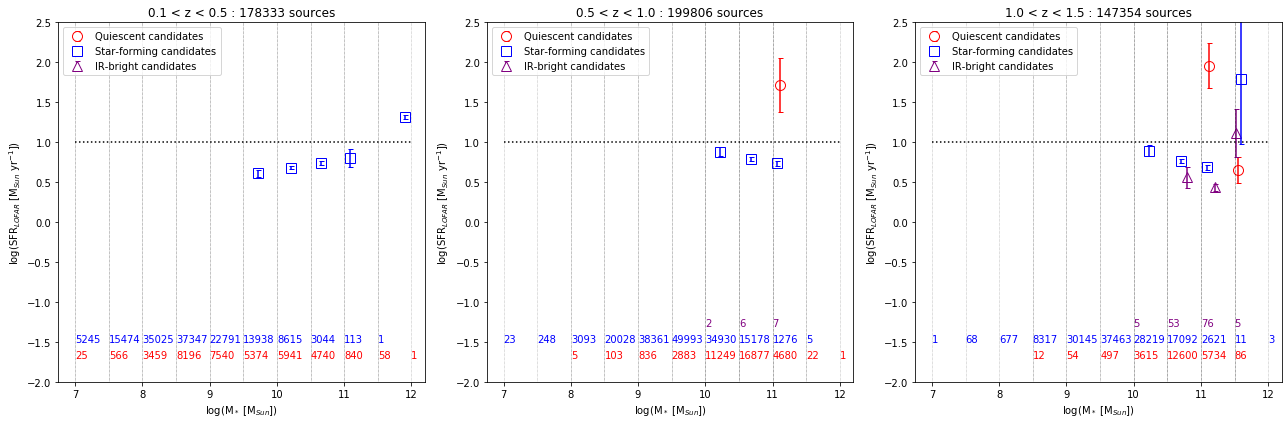

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()